# <p> <center style="background-color:#5c0707;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px">  Video games sales regression techniques   </center></p>


# Table of Contents

1. [Introduction](#introduction)  
2. [Data Description](#data-description)  
3. [Data Preprocessing](#data-preprocessing)  
4. [Data Visualizations](#4-visualizations-of-the-data-and-analysis)
5. [Model Training](#5-statistical-models-for-regression)
6. [Model Evaluation](#6-metrics-evaluation)
7. [Conclusion](#7-conclusion)  
8. [References](#8-references)  

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 1. Introduction </center></p>

Forecasting video game sales is a useful tool for publishers, developers, and investors in the gaming sector.  
Based on important characteristics including user ratings, critic reviews, and time since release, we can forecast a video game's worldwide sales using machine learning regression algorithms.

This project aims to:
- Examine the effects of various qualities on sales performance.

- Apply and compare multiple regression models (Linear Regression, KNN, Decision Trees).

- Use code documentation and environment control to guarantee reproducibility.

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 2. Data Description </center></p>

The dataset used is from [Kaggle](https://www.kaggle.com/code/yonatanrabinovich/video-games-sales-regression-techniques), titled **“Video games sales regression techniques”**.

- **Rows**: 16,719 video games  
- **Columns**: 16 variables, including:
  - `Name`: Game title  
  - `Platform`: Console/platform (e.g., PS4, X360)  
  - `Year_of_Release`: Year the game was released  
  - `Genre`, `Publisher`: Category and publisher of the game  
  - `Critic_Score`, `User_Score`: Aggregated ratings from critics and users  
  - `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`: Regional sales in millions  
  - `Global_Sales`: Total worldwide sales (target variable)
  - `Critic_Count`, `User_Count`: number of critics used for critics score and number of users who gave user score
  - `Developer`: Developer of the game
  - `Rating`: The ESRB ratings
  - `Game_Age`: Calculated as `2016 - Year_of_Release` to measure how long a game has been on the market.



### Loading necassary packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import random, os
SEED = 5 # like in the original project
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 3. Data preprocessing  </center></p>

In [3]:
# Load dataset
vgsales = pd.read_csv('Data/Video_Games_Sales_as_at_22_Dec_2016.csv', na_values=["", " ", "NA", "N/A"])

In [4]:
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check structure
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
# Table to count number of NAs 
na_count = vgsales.isna().sum()

na_count = pd.DataFrame(na_count, columns=['na_count'])

na_count


,na_count
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [7]:
# Drop all NA values as the original project
vgsales = vgsales.dropna()


In [8]:
# Drop all sales except global
vgsales = vgsales.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])


In [9]:
# Recalculate 'Year_of_Release' as game age
vgsales['Game_Age'] = 2016 - vgsales['Year_of_Release']
vgsales = vgsales.drop(columns=['Year_of_Release'])


In [10]:
vgsales.head()

,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
0,Wii Sports,Wii,Sports,Nintendo,82.53,76.0,51.0,8,322.0,Nintendo,E,10.0
2,Mario Kart Wii,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.0
3,Wii Sports Resort,Wii,Sports,Nintendo,32.77,80.0,73.0,8,192.0,Nintendo,E,7.0
6,New Super Mario Bros.,DS,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,10.0
7,Wii Play,Wii,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,10.0


In [11]:
# Summary table
vgsales.describe(include='all')


,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
count,6825,6825,6825,6825,6825.000000,6825.000000,6825.000000,6825,6825.000000,6825,6825,6825.000000
unique,4377,17,12,262,NaN,NaN,NaN,89,NaN,1289,7,NaN
top,Madden NFL 07,PS2,Action,Electronic Arts,NaN,NaN,NaN,7.8,NaN,EA Canada,T,NaN
freq,8,1140,1630,944,NaN,NaN,NaN,294,NaN,149,2377,NaN
mean,NaN,NaN,NaN,NaN,0.777590,70.272088,28.931136,NaN,174.722344,NaN,NaN,8.563223
std,NaN,NaN,NaN,NaN,1.963443,13.868572,19.224165,NaN,587.428538,NaN,NaN,4.211248
min,NaN,NaN,NaN,NaN,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.110000,62.000000,14.000000,NaN,11.000000,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,0.290000,72.000000,25.000000,NaN,27.000000,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,0.750000,80.000000,39.000000,NaN,89.000000,NaN,NaN,12.000000


In [12]:
vgsales.to_csv('Data/vgsales_cleaned.csv')

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 4. Visualizations of the data and analysis  </center></p>


Below we will go through visualisations based on the already cleaned dataset - without the need to run the whole data cleaning part again. 

In [13]:
# Load clean dataset
df = pd.read_csv('Data/vgsales_cleaned.csv')

In [14]:
df.head()

,Unnamed: 0,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
0,0,Wii Sports,Wii,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,10.0
1,2,Mario Kart Wii,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.0
2,3,Wii Sports Resort,Wii,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,7.0
3,6,New Super Mario Bros.,DS,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,10.0
4,7,Wii Play,Wii,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,10.0


## Univariate plots

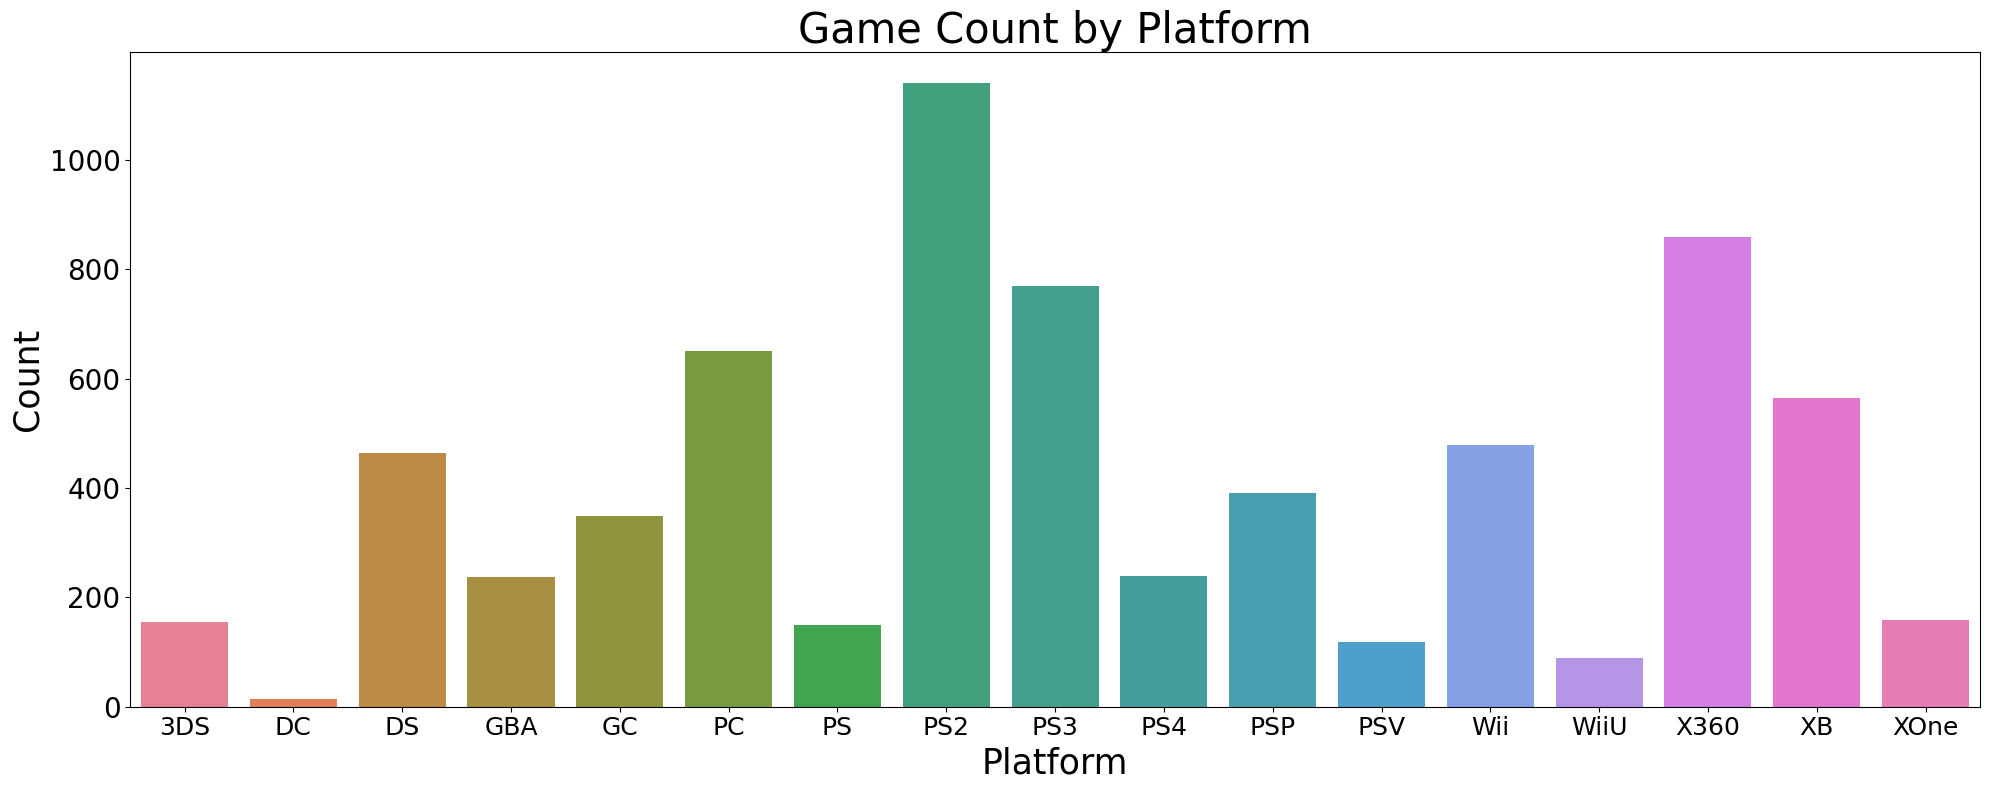

In [15]:
plt.figure(figsize=(20, 8))

# for easier visual comparison to original
platform_order = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

df['Platform'] = pd.Categorical(df['Platform'], categories=platform_order, ordered=True)

palette = sns.color_palette('husl', n_colors=len(platform_order))
Platform_bar = sns.countplot(data=df, x='Platform', order=platform_order, palette=palette)
Platform_bar.set_title("Game Count by Platform", fontsize=30)
Platform_bar.set_xlabel("Platform", fontsize=25)
Platform_bar.set_ylabel("Count", fontsize=25)
Platform_bar.tick_params(axis='x', labelsize=18)
Platform_bar.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()



The chart is identical to it's original showing for PS2 and X360 highest game count. 

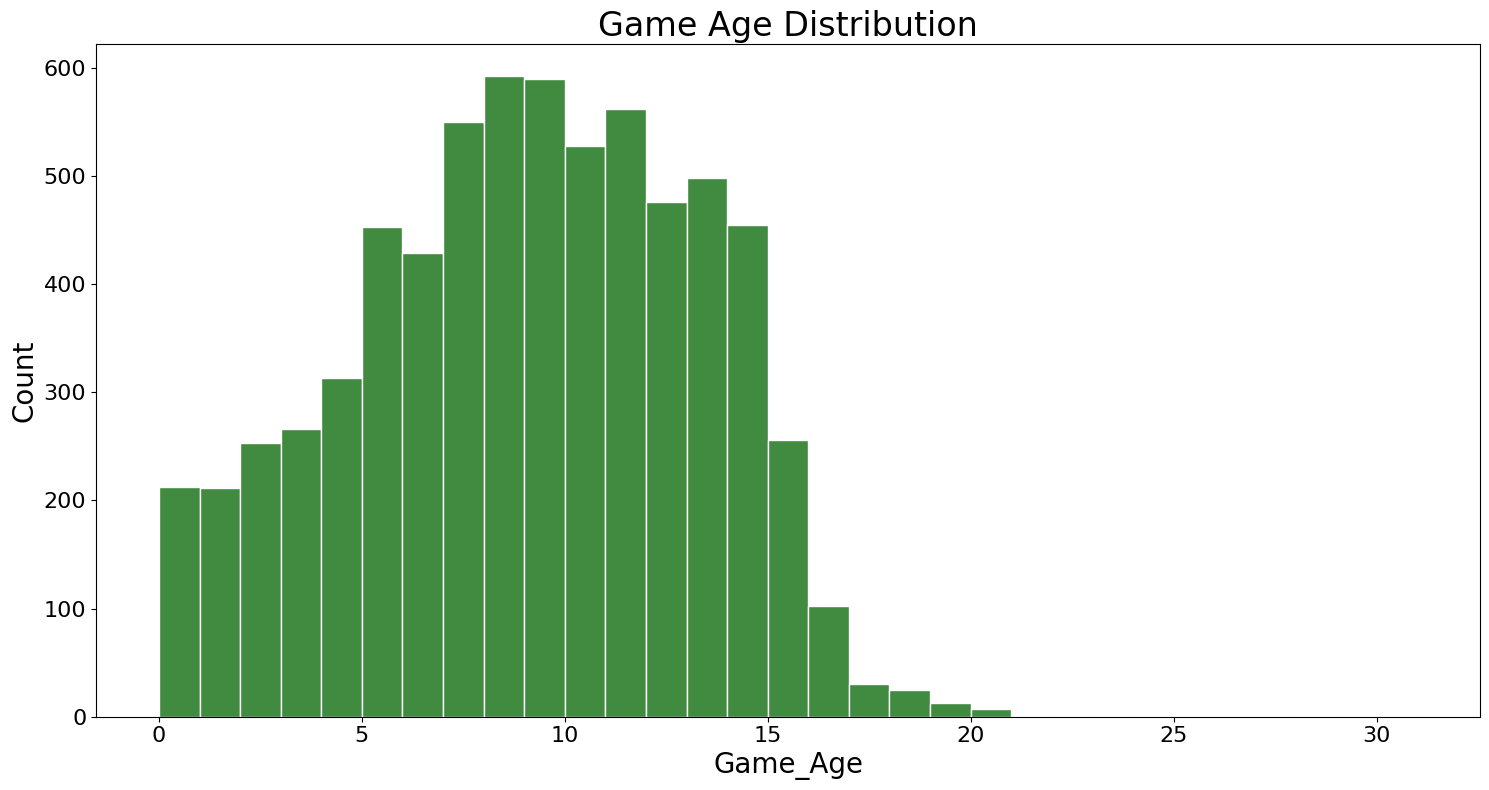

In [16]:
plt.figure(figsize=(15, 8))

sns.histplot(
    df['Game_Age'],
    binwidth=1,
    color='darkgreen',
    edgecolor='white'
)

plt.xlabel('Game_Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Game Age Distribution', fontsize=24)
plt.tight_layout()
plt.show()

The chart again is very similar to the original, we do not see the sparse values above 20 - because of the small count - but they exist. 

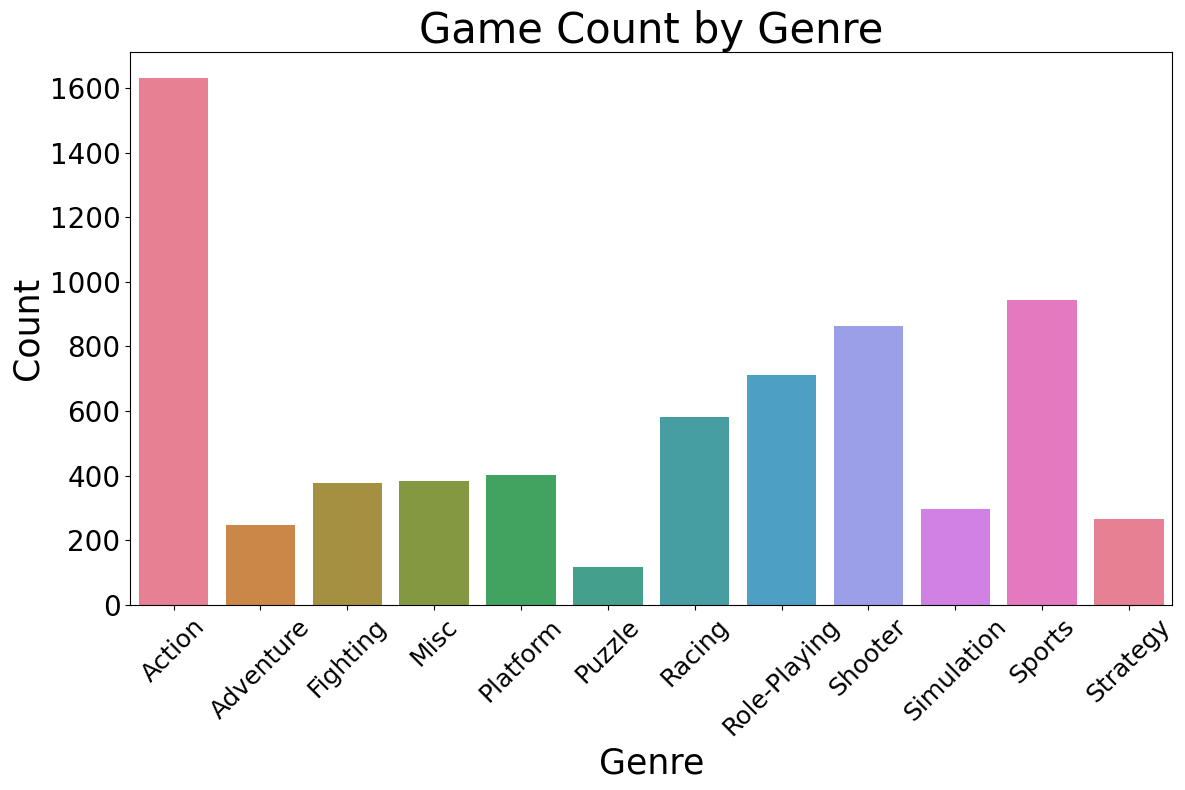

In [17]:
plt.figure(figsize=(12, 8))

# for easier visual comparison to original
genre_order = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing',"Role-Playing",'Shooter','Simulation','Sports','Strategy']

df['Genre'] = pd.Categorical(df['Genre'], categories=genre_order, ordered=True)

palette = sns.color_palette('husl', n_colors=len('genre_order'))
Platform_bar = sns.countplot(data=df, x='Genre', palette=palette)
Platform_bar.set_title("Game Count by Genre", fontsize=30)
Platform_bar.set_xlabel("Genre", fontsize=25)
Platform_bar.set_ylabel("Count", fontsize=25)
Platform_bar.tick_params(axis='x', labelsize=18, rotation=45)
Platform_bar.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()


This plot shows the most popular genres are Action, Shooter and Sports. 

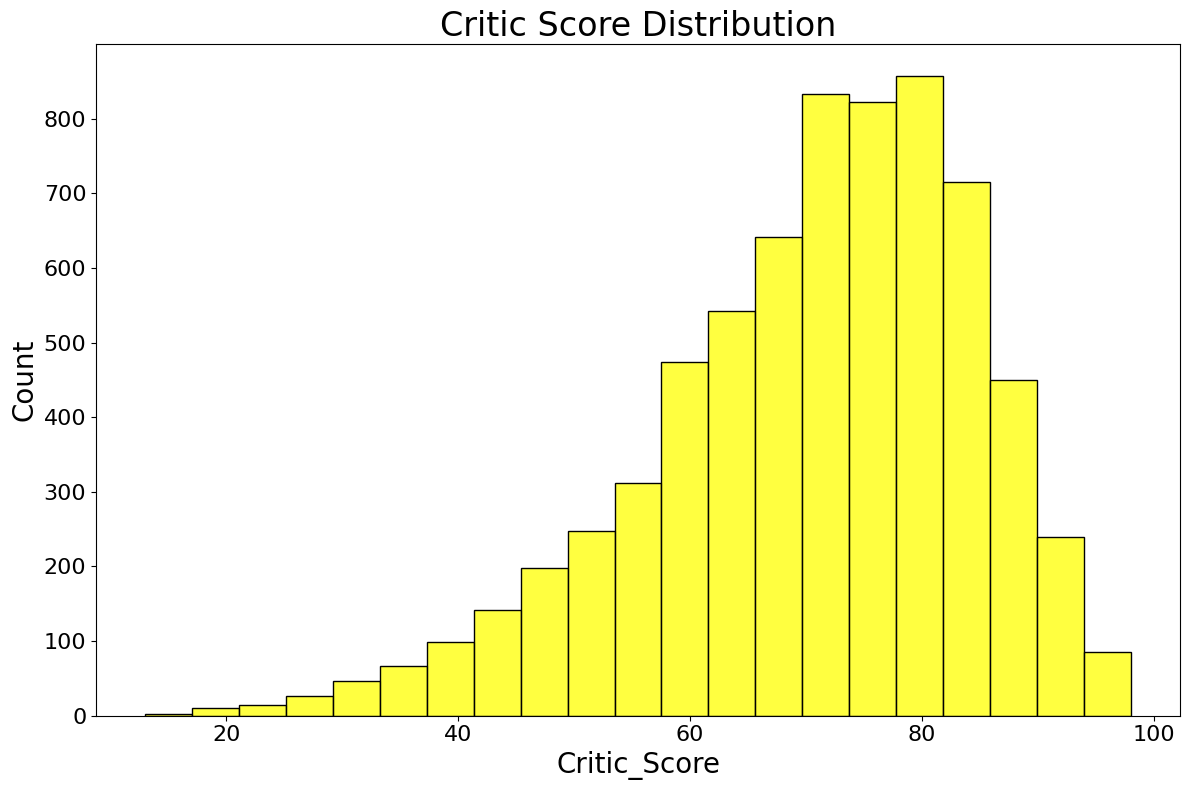

In [18]:
plt.figure(figsize=(12, 8))

sns.histplot(
    df['Critic_Score'],
    binwidth=4,
    color='yellow',
    edgecolor='black'
)

plt.xlabel('Critic_Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Critic Score Distribution', fontsize=24)
plt.tight_layout()
plt.show()

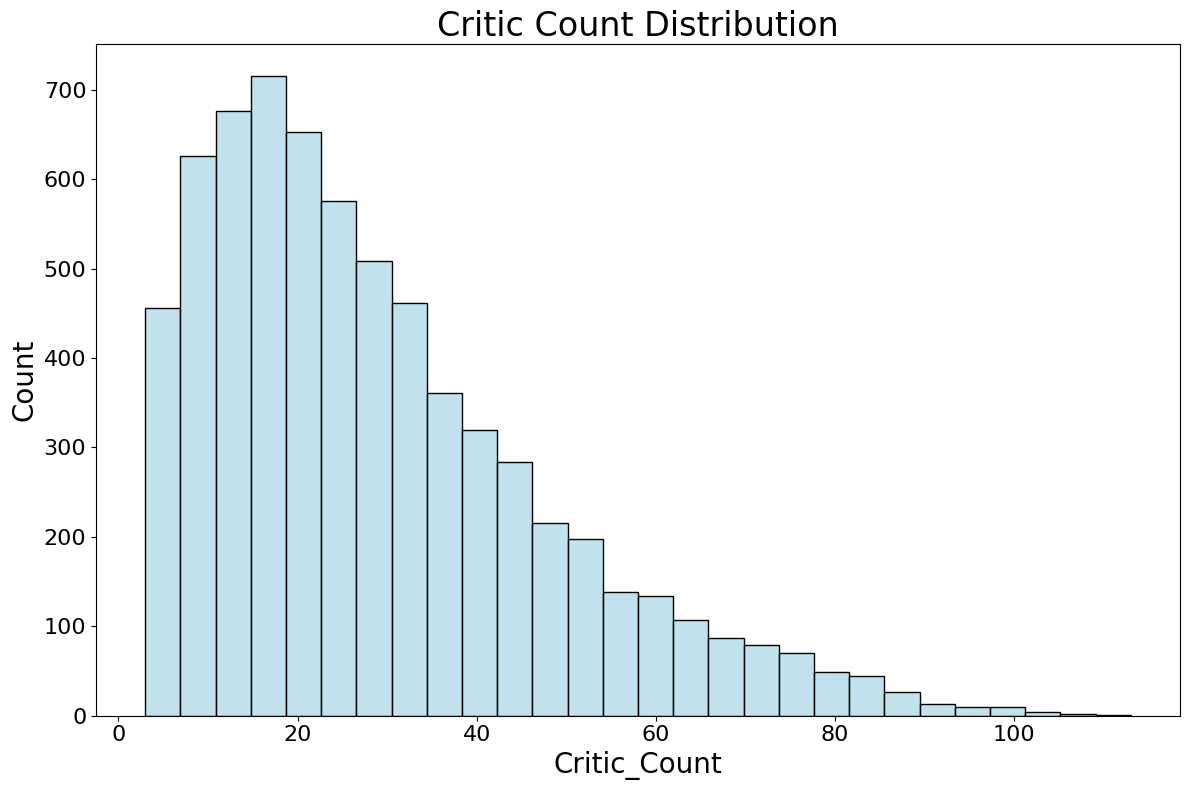

In [19]:
plt.figure(figsize=(12, 8))

sns.histplot(
    df['Critic_Count'],
    binwidth=4,
    color='lightblue',
    edgecolor='black'
)

plt.xlabel('Critic_Count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Critic Count Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [20]:
top10_df = df[['Name', 'User_Score']].sort_values(by='Name')
top10_df = top10_df.sort_values(by='Name').sort_values(by='User_Score', ascending=False).head(20)

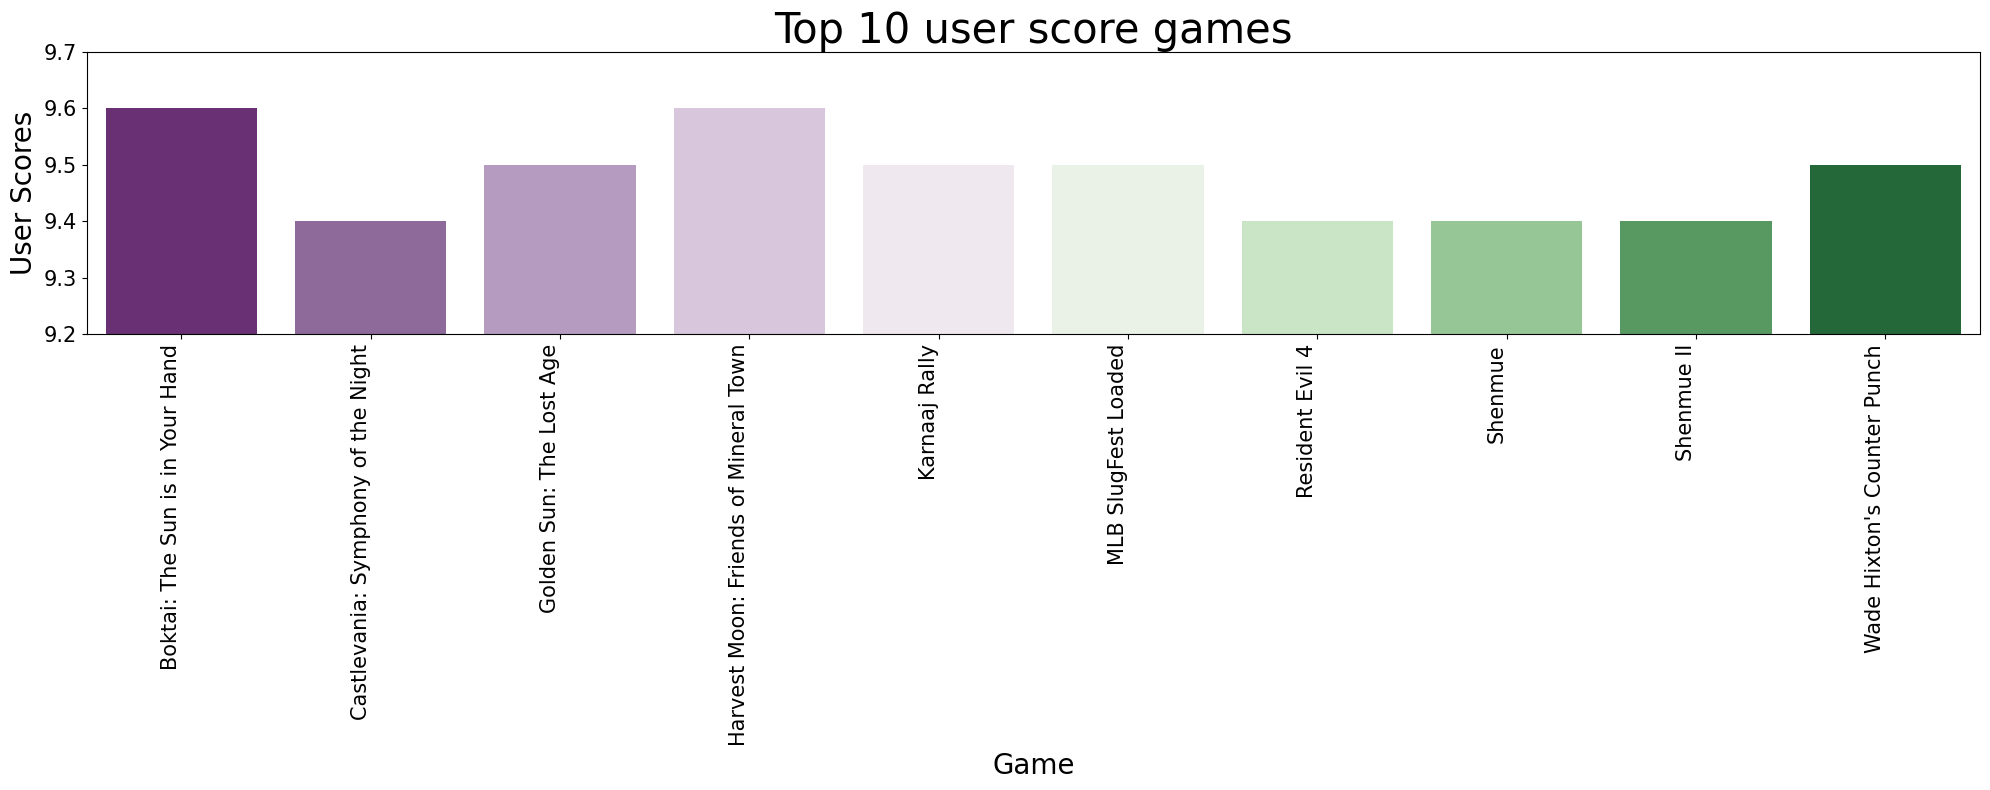

In [21]:
top10_df = df[['Name', 'User_Score']].sort_values(by='Name') # First i needed to sort by alphabetical order, 
#because there are multiple titles with same score and R chart took them alphabetically. 
top10_df = top10_df.sort_values(by='Name').sort_values(by='User_Score', ascending=False).head(10)
top10_df = top10_df.sort_values(by='Name')  # <- Alphabetical order in plot
top10_df['Name'] = pd.Categorical(top10_df['Name'], categories=top10_df['Name'], ordered=True)
plt.figure(figsize=(20, 8))

sns.barplot(data=top10_df, x='Name', y='User_Score', palette='PRGn')

plt.ylim(9.2, 9.7) 

plt.title("Top 10 user score games", fontsize=30)
plt.xlabel("Game", fontsize=20)
plt.ylabel("User Scores", fontsize=20)
plt.xticks(rotation=90, fontsize=15, ha='right')
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()


This plot differs slightly from original because of multiple games (11) ranking at the 3 place with score of 9.4

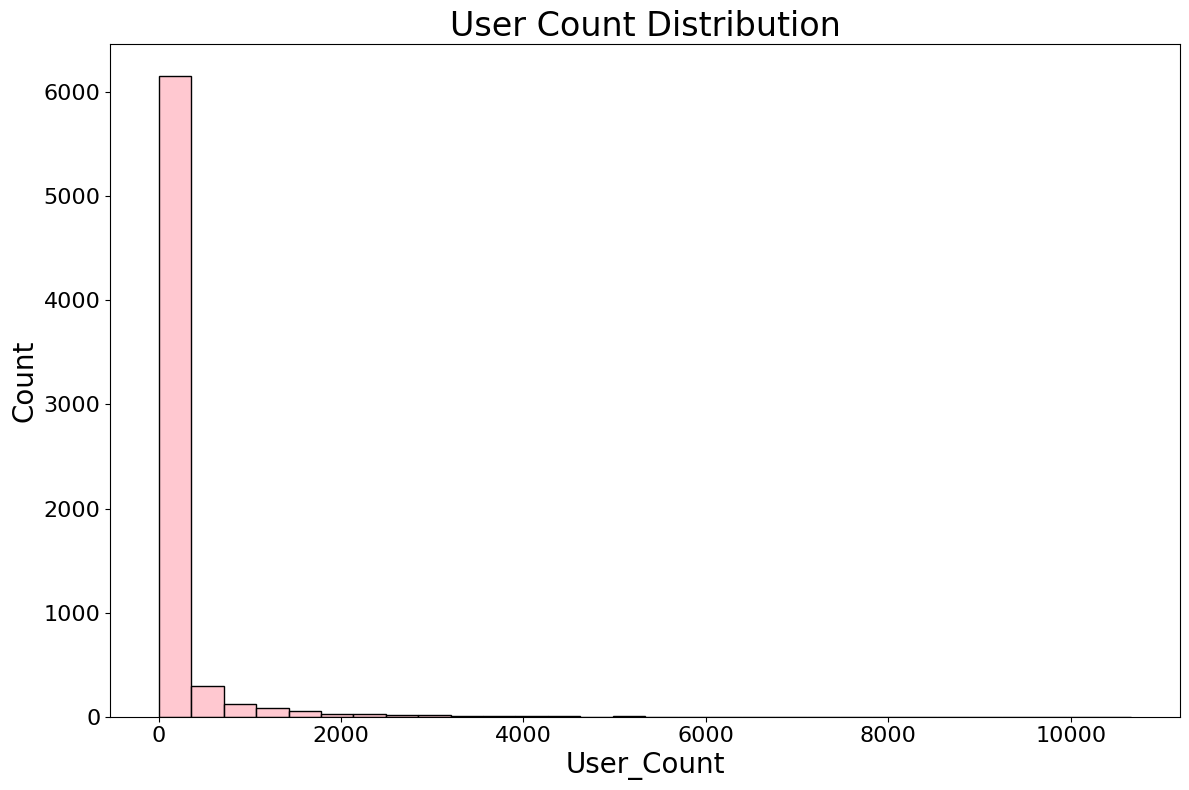

In [22]:
plt.figure(figsize=(12, 8))

sns.histplot(
    df['User_Count'],
    bins=30,
    color='lightpink',
    edgecolor='black'
)

plt.xlabel('User_Count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('User Count Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [23]:
summary = df['User_Count'].describe()
print(f'''
Min.   : {summary["min"]}
1st Qu.: {summary["25%"]}
Median : {summary["50%"]}
Mean   : {summary["mean"]:.1f}
3rd Qu.: {summary["75%"]}
Max.   : {summary["max"]}
''')


Min.   : 4.0
1st Qu.: 11.0
Median : 27.0
Mean   : 174.7
3rd Qu.: 89.0
Max.   : 10665.0



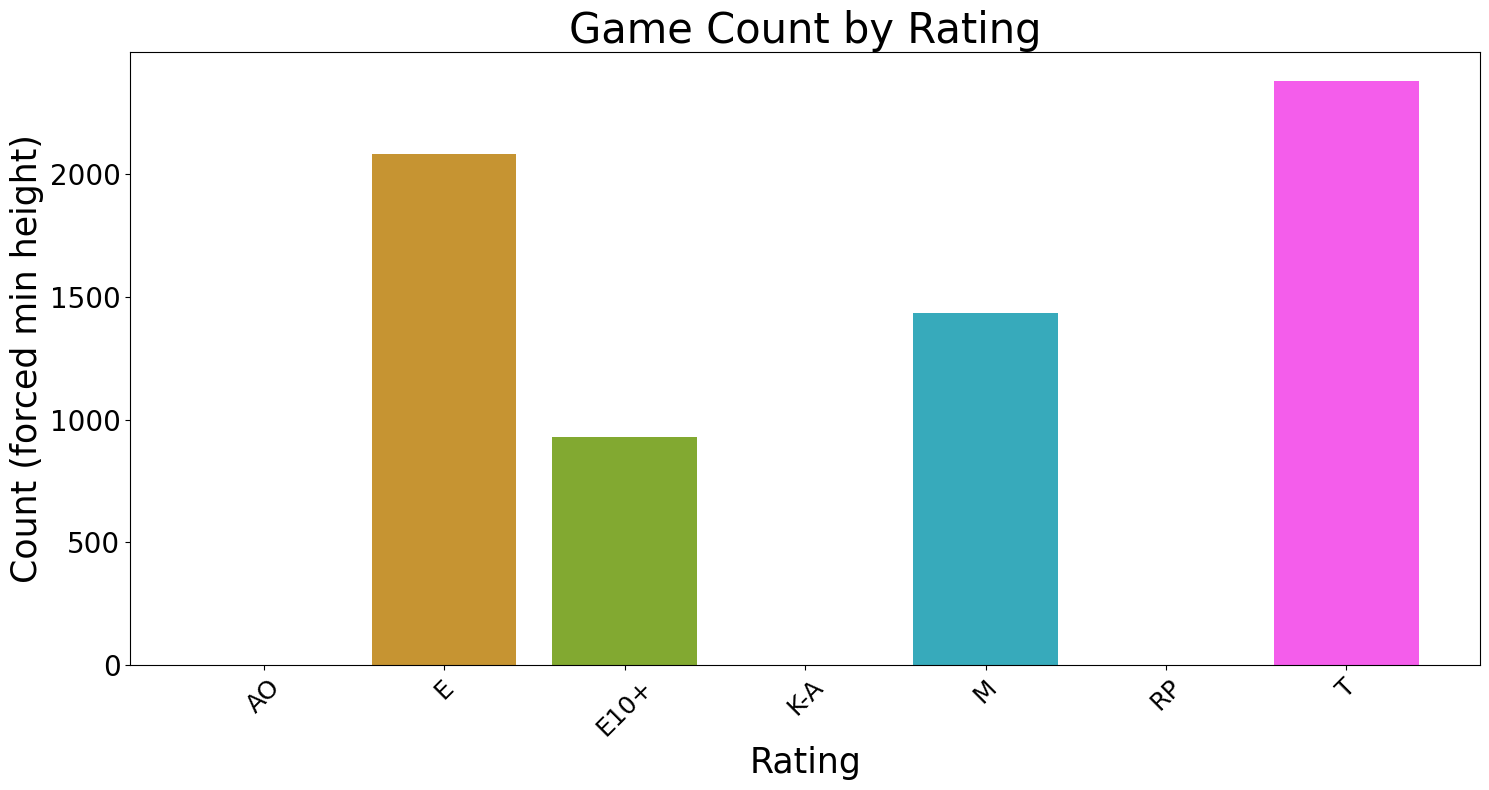

In [24]:
rating_order = ['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T']
df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True)
rating_counts = df['Rating'].value_counts().reindex(rating_order, fill_value=0)
rating_counts += 1
plt.figure(figsize=(15, 8))
bars = plt.bar(rating_counts.index, rating_counts.values, color=sns.color_palette('husl', len(rating_order)))

plt.title("Game Count by Rating", fontsize=30)
plt.xlabel("Rating", fontsize=25)
plt.ylabel("Count (forced min height)", fontsize=25)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()


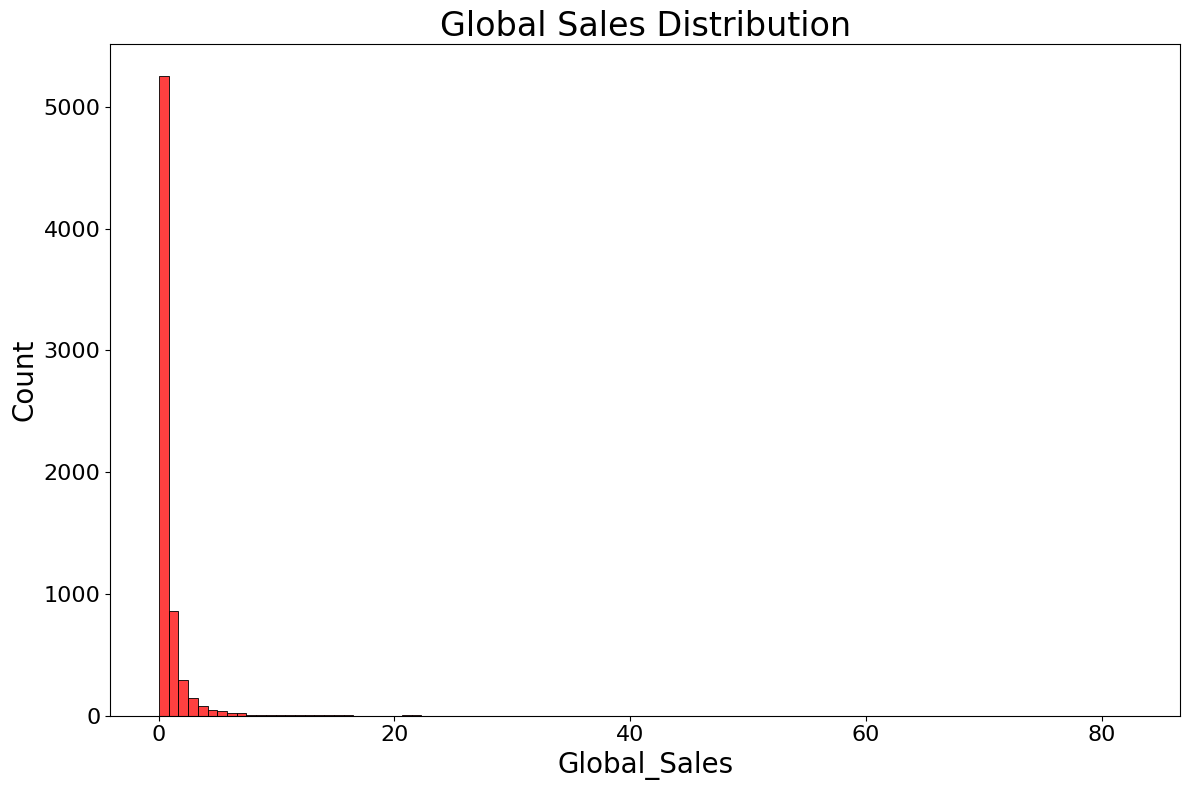

In [25]:
plt.figure(figsize=(12, 8))

sns.histplot(
    df['Global_Sales'],
    bins=100,
    color='red',
    edgecolor='black'
)

plt.xlabel('Global_Sales', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Global Sales Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [26]:
summary = df['Global_Sales'].describe()
print(f'''
Min.   : {summary["min"]}
1st Qu.: {summary["25%"]}
Median : {summary["50%"]}
Mean   : {summary["mean"]:.4f}
3rd Qu.: {summary["75%"]}
Max.   : {summary["max"]}
''')


Min.   : 0.01
1st Qu.: 0.11
Median : 0.29
Mean   : 0.7776
3rd Qu.: 0.75
Max.   : 82.53



## Multivariate plots

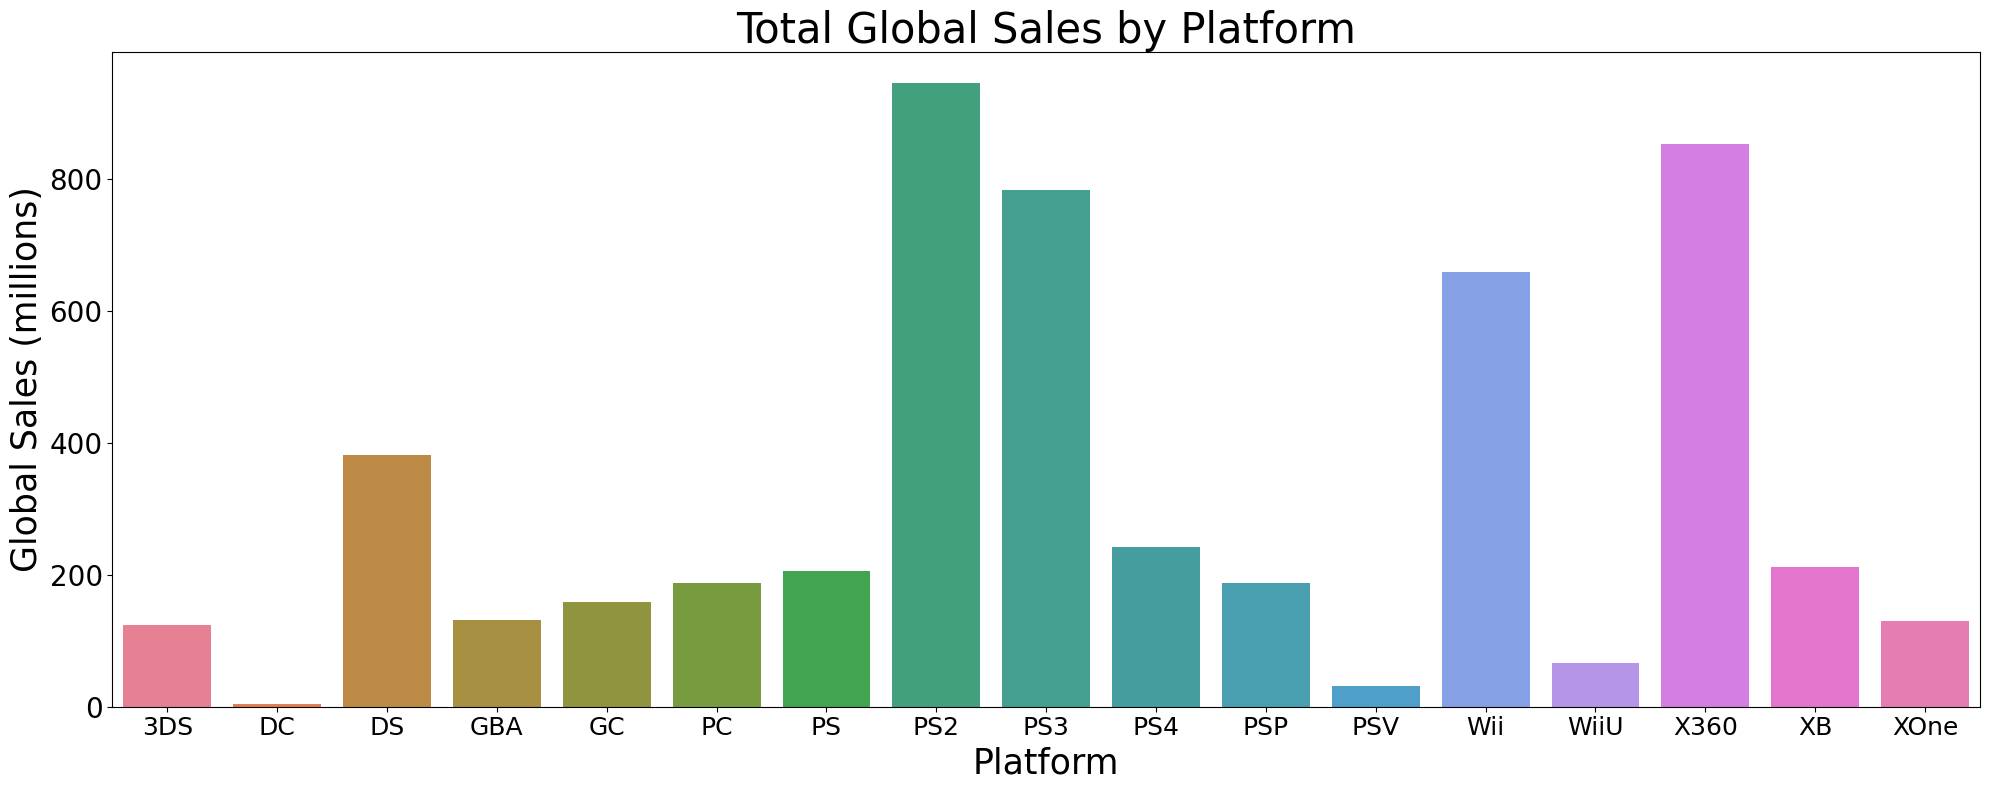

In [27]:
plt.figure(figsize=(20, 8))

# for easier visual comparison to original
platform_order = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

df['Platform'] = pd.Categorical(df['Platform'], categories=platform_order, ordered=True)

palette = sns.color_palette('husl', n_colors=len(platform_order))
Platform_sales_bar = sns.barplot(
    data=df,
    x='Platform',
    y='Global_Sales',
    order=platform_order,
    estimator=sum,
    palette=palette,
    ci= None
)

Platform_sales_bar.set_title("Total Global Sales by Platform", fontsize=30)
Platform_sales_bar.set_xlabel("Platform", fontsize=25)
Platform_sales_bar.set_ylabel("Global Sales (millions)", fontsize=25)
Platform_sales_bar.tick_params(axis='x', labelsize=18)
Platform_sales_bar.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()

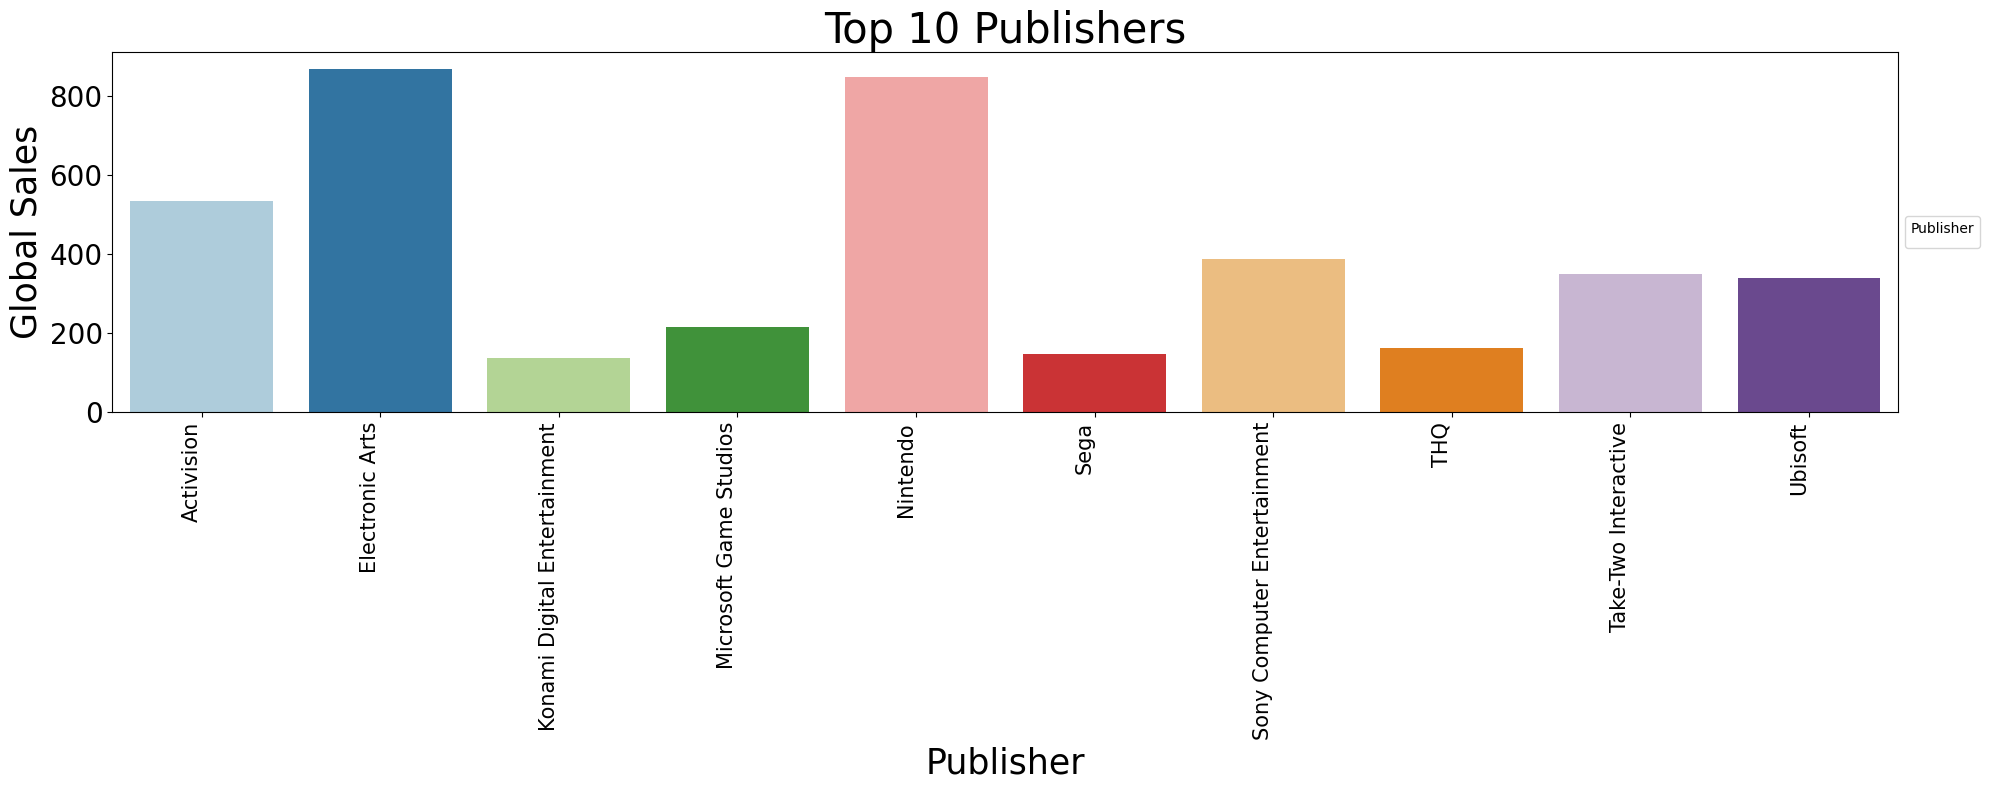

In [28]:
top_publishers = (
    df.groupby('Publisher', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
    .head(10)
)

top_publishers = top_publishers.sort_values(by='Publisher')

plt.figure(figsize=(20, 8))
palette = sns.color_palette("Paired", n_colors=10)
sns.barplot(data=top_publishers, x='Publisher', y='Global_Sales', hue='Publisher', palette=palette, dodge=False)

plt.title("Top 10 Publishers", fontsize=30)
plt.xlabel("Publisher", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.xticks(rotation=90, fontsize=15, va='top', ha='right')
plt.yticks(fontsize=20)
plt.legend(title='Publisher', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

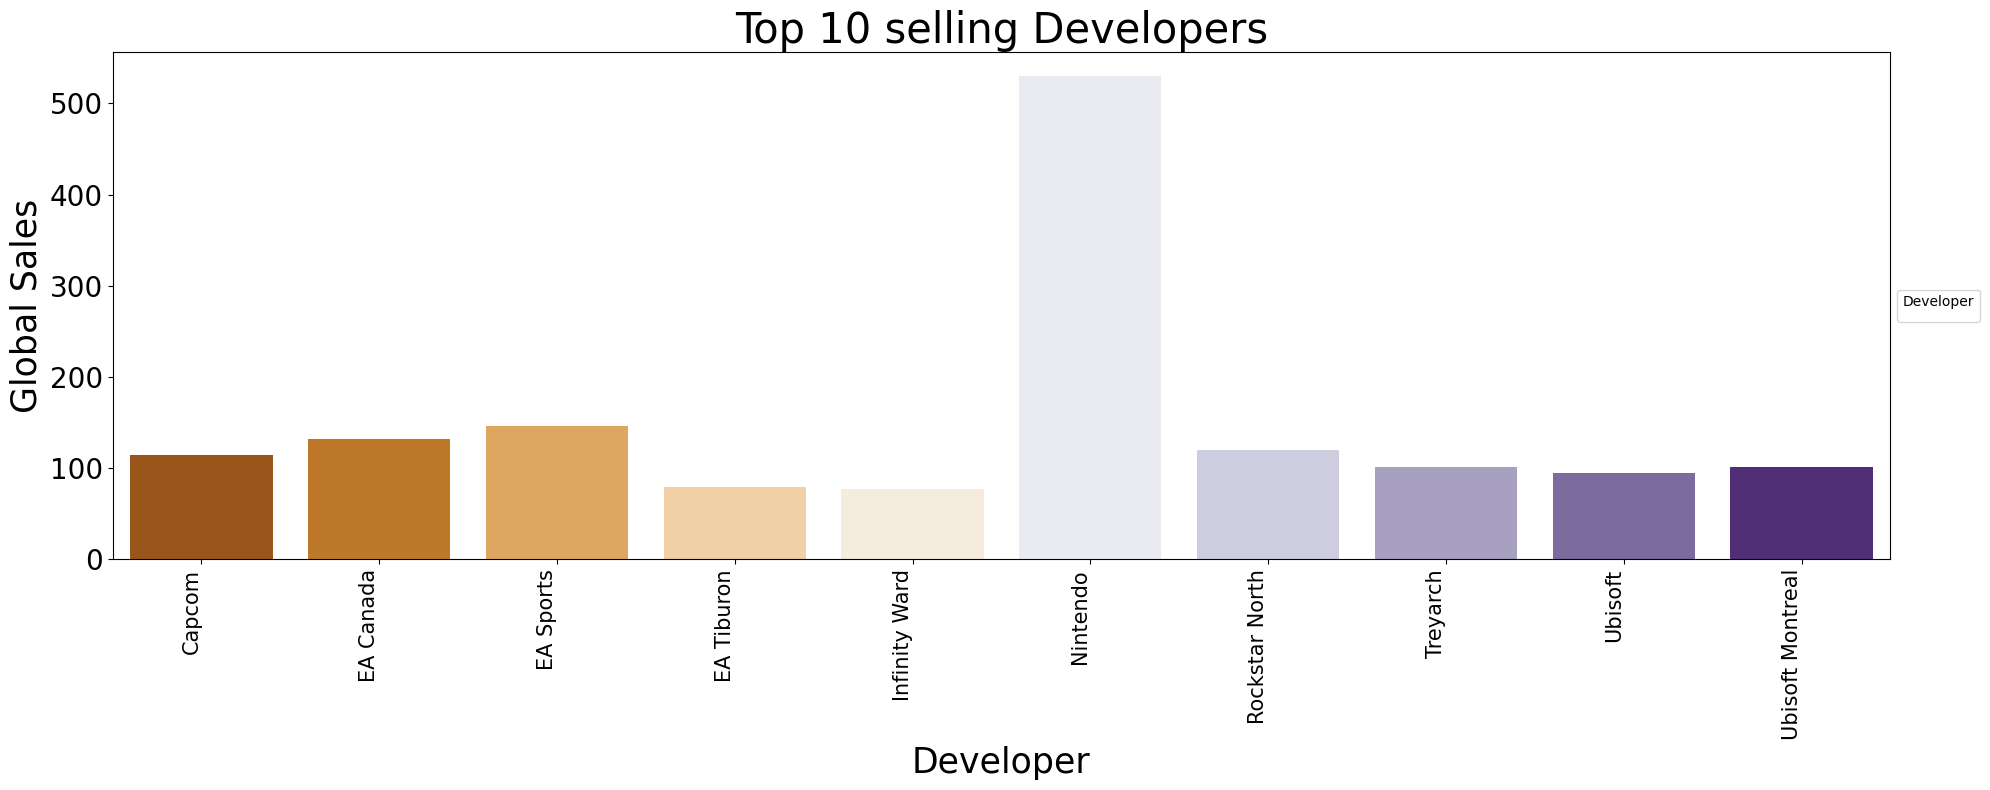

In [29]:
top_developers = (
    df.groupby('Developer', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
    .head(10)
)

top_developers = top_developers.sort_values(by='Developer')
plt.figure(figsize=(20, 8))
palette = sns.color_palette("PuOr", n_colors=10)
sns.barplot(
    data=top_developers,
    x='Developer',
    y='Global_Sales',
    hue='Developer',
    palette=palette,
    dodge=False
)
plt.title("Top 10 selling Developers", fontsize=30)
plt.xlabel("Developer", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.xticks(rotation=90, fontsize=15, va='top', ha='right')
plt.yticks(fontsize=20)
plt.legend(title='Developer', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

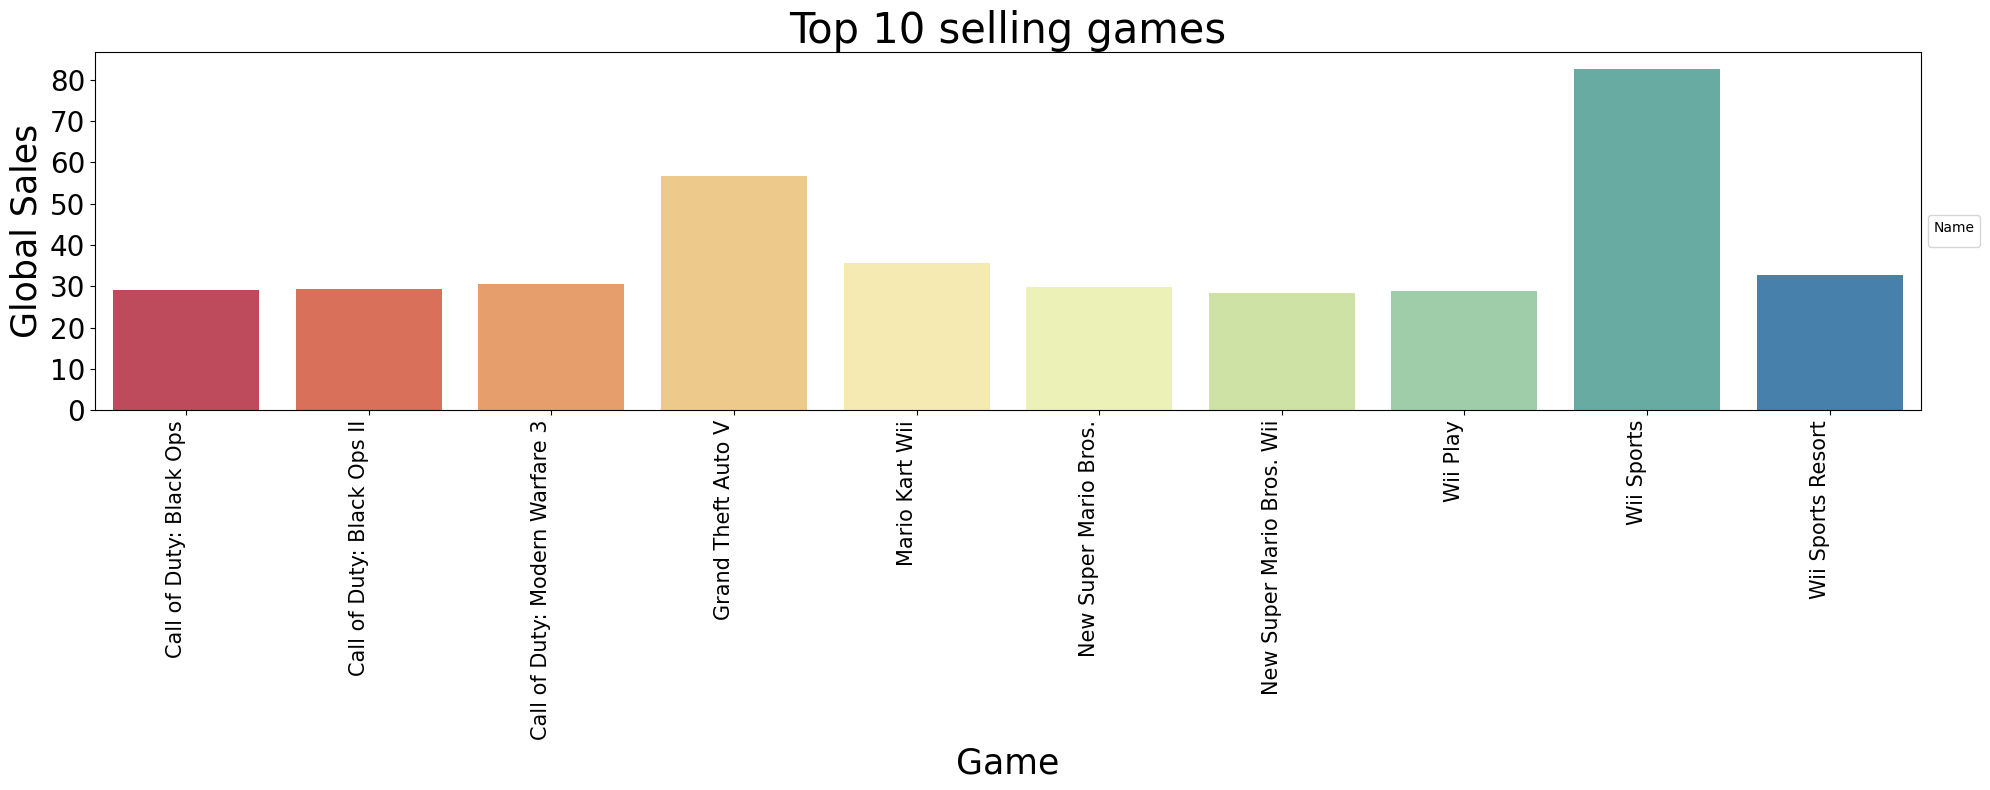

In [30]:
top_games = (
    df[['Name', 'Global_Sales']]
    .groupby('Name', as_index=False)
    .sum()
    .sort_values('Global_Sales', ascending=False)
    .head(10)
)

top_games = top_games.sort_values('Name')

plt.figure(figsize=(20, 8))

palette = sns.color_palette("Spectral", n_colors=10)
sns.barplot(
    data=top_games,
    x='Name',
    y='Global_Sales',
    hue='Name',
    palette=palette,
    dodge=False
)

plt.title("Top 10 selling games", fontsize=30)
plt.xlabel("Game", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.xticks(rotation=90, fontsize=15, va='top', ha='right')
plt.yticks(fontsize=20)
plt.legend(title='Name', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

This chart differs significantly from the source, in source we don't have some of ht ebest selling games, notably Grand Theft Auto V - which takes second place in global sales or Call of Duty that takes 5th. 

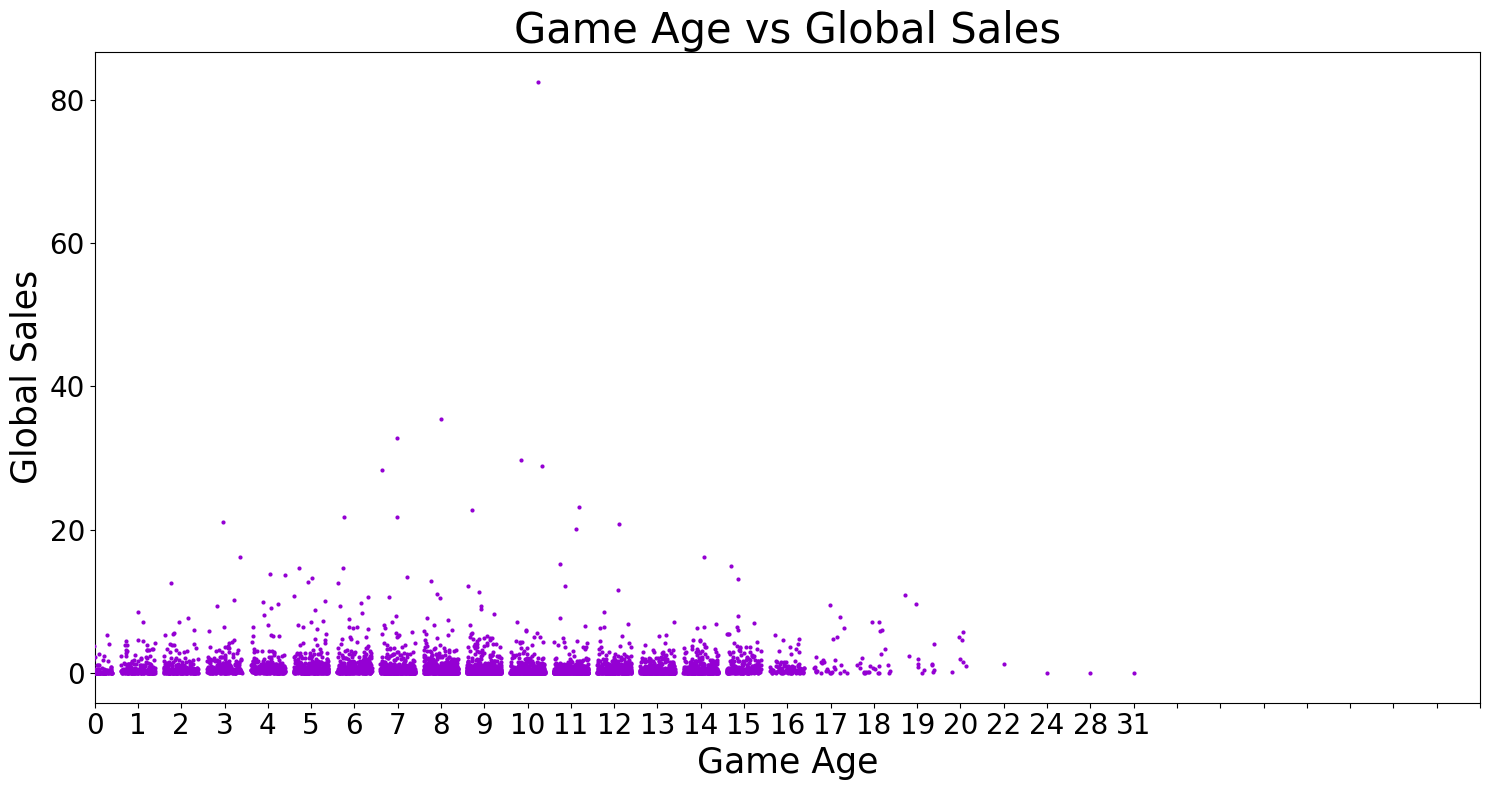

In [31]:
plt.figure(figsize=(15, 8))
df['Game_Age_Int'] = df['Game_Age'].astype(int)

sns.stripplot(
    data=df,
    x='Game_Age_Int',
    y='Global_Sales',
    jitter=0.40,
    color='darkviolet',
    size=3
)

plt.xlabel("Game Age", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.title("Game Age vs Global Sales", fontsize=30)

plt.xticks(ticks=np.arange(0, 33, 1), fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 32)

plt.tight_layout()
plt.show()

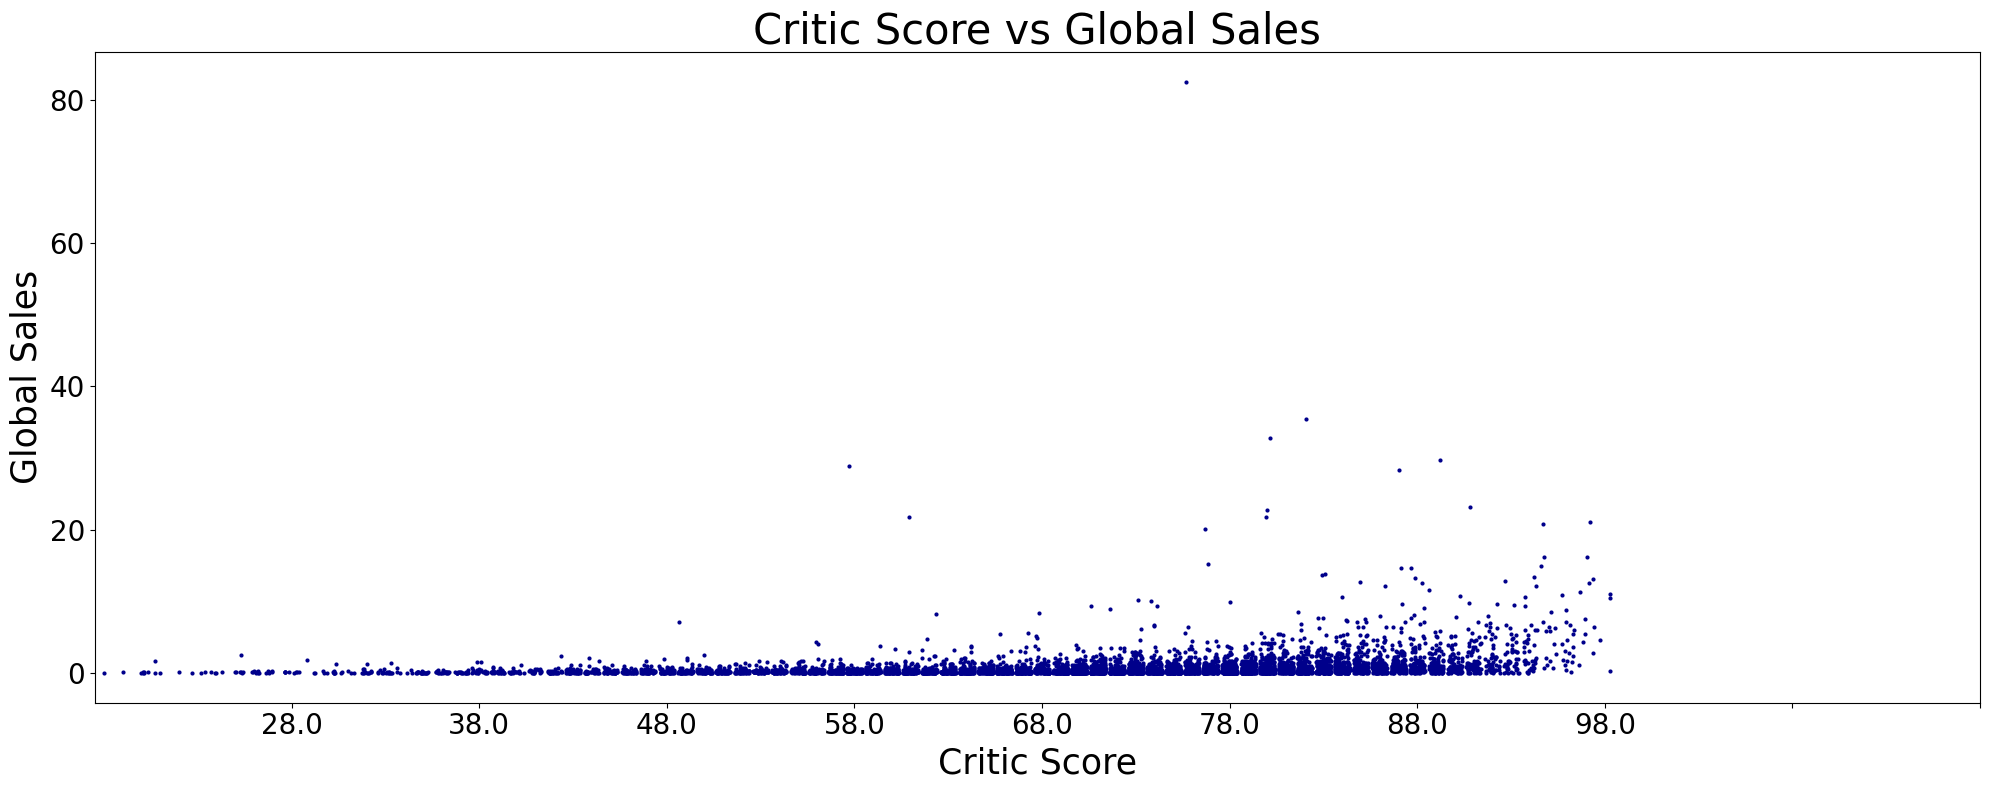

In [32]:
plt.figure(figsize=(20, 8))
sns.stripplot(
    data=df,
    x='Critic_Score',
    y='Global_Sales',
    jitter=0.4,
    color='darkblue',
    size=3
)

plt.xlabel("Critic Score", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.title("Critic Score vs Global Sales", fontsize=30)

xticks = np.arange(10, 101, 10)
plt.xticks(xticks, fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

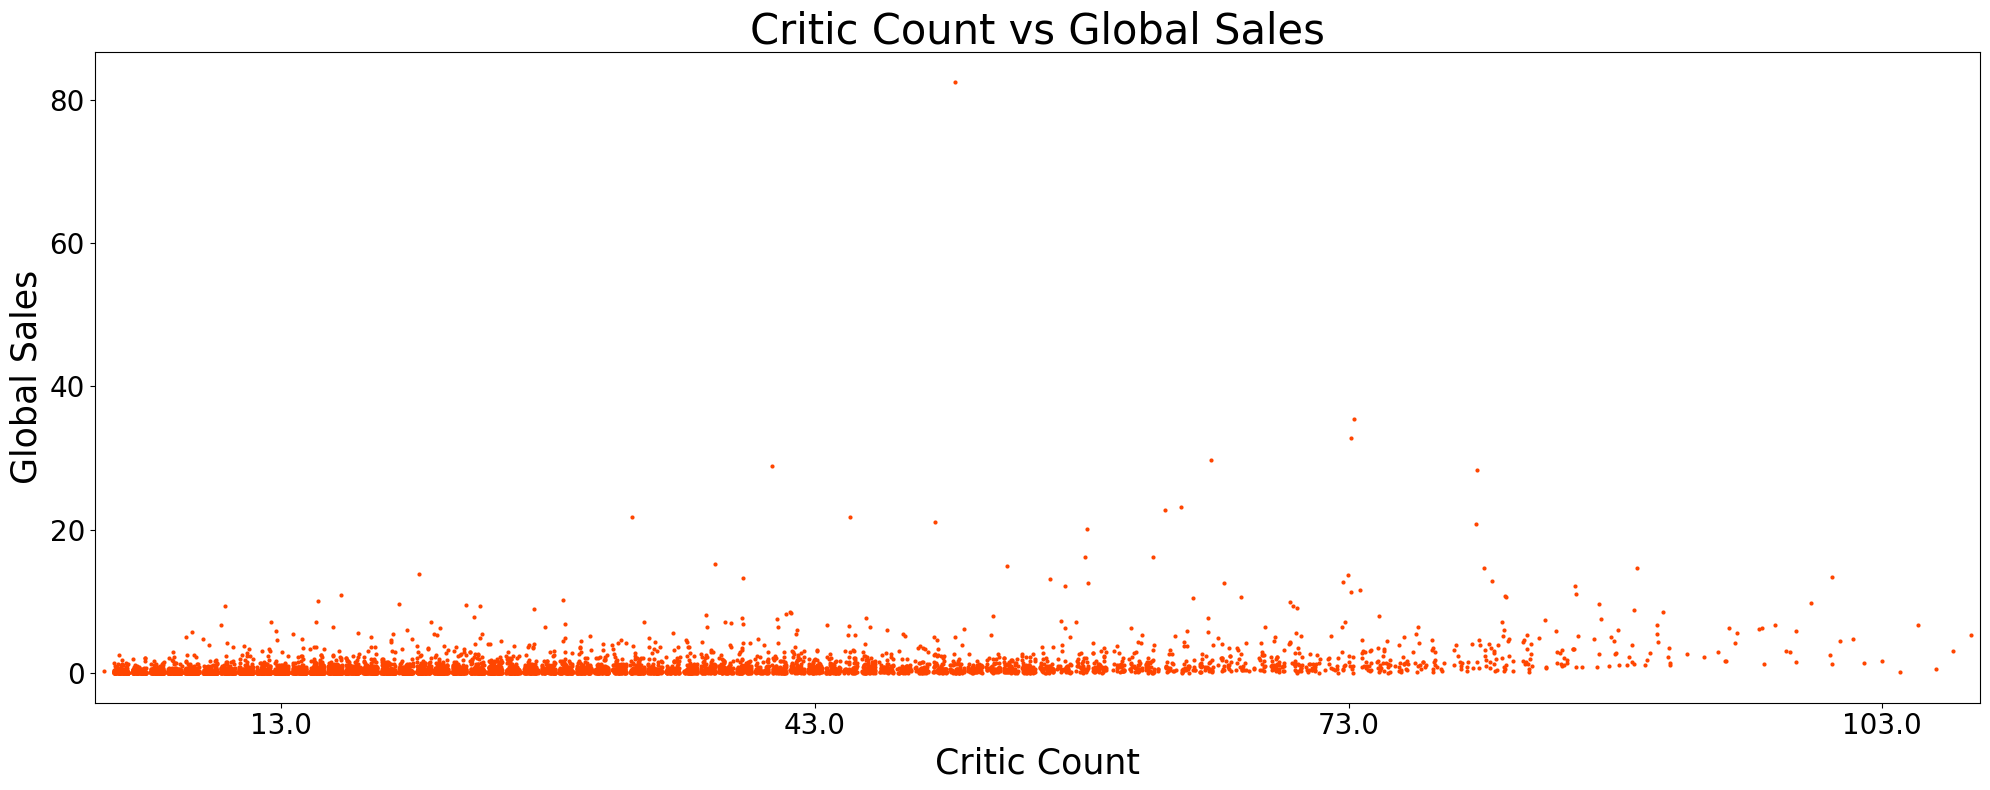

In [33]:
plt.figure(figsize=(20, 8))
sns.stripplot(
    data=df,
    x='Critic_Count',
    y='Global_Sales',
    jitter=0.4,
    color='orangered',
    size=3
)

plt.xlabel("Critic Count", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.title("Critic Count vs Global Sales", fontsize=30)

xticks = np.arange(10, 130, 30)
plt.xticks(xticks, fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

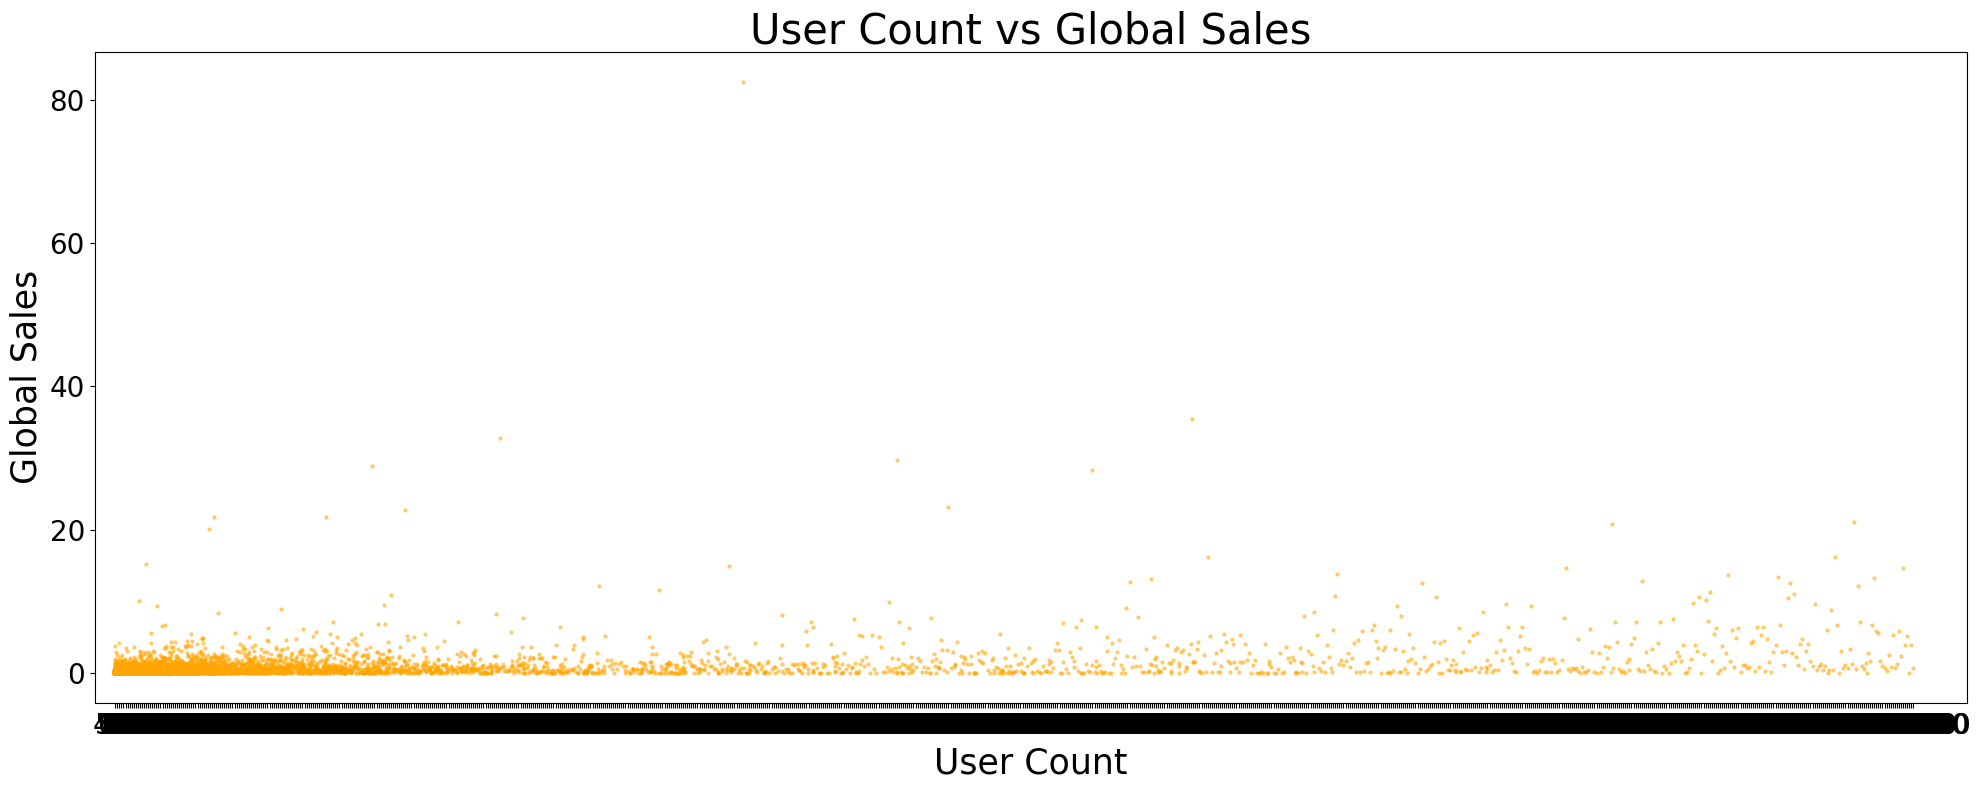

In [34]:
plt.figure(figsize=(20, 8))

sns.stripplot(
    data=df,
    x='User_Count',
    y='Global_Sales',
    jitter=0.4,
    color='orange',
    size=3,
    alpha=0.6,           
    linewidth=0             
)

plt.xlabel("User Count", fontsize=25)
plt.ylabel("Global Sales", fontsize=25)
plt.title("User Count vs Global Sales", fontsize=30)

plt.xlim(-10, 900)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 5. Statistical Models For Regression  </center></p>

## KNN Regressor

The following steps summarize the KNN regression workflow implemented in this notebook:

#### KNN Model Overview
1. Data Preparation  
2. Train/Test Split  
3. Baseline Model (k=3)  
4. Feature Importance Assessment  
5. Hyperparameter Search (MSE vs. k on full and reduced feature sets)  
6. Final Evaluation (LOOCV at optimal k)  
 



#### Data Preparation  
We began by loading the cleaned video game sales dataset and dropping the non-predictive columns (`Unnamed: 0` and `Name`). All remaining categorical features (`Platform`, `Genre`, `Publisher`, `Developer`, `Rating`) were then converted to numeric codes. All the features were scaled to the same range.


In [76]:
#1Data preparation
df.head()
knn_df = df.drop(columns=['Unnamed: 0', 'Name']).copy()

for col in knn_df.columns:
    if knn_df[col].dtype == 'object':
        knn_df[col], _ = pd.factorize(knn_df[col])
knn_df.info()
knn_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      6825 non-null   category
 1   Genre         6825 non-null   category
 2   Publisher     6825 non-null   int64   
 3   Global_Sales  6825 non-null   float64 
 4   Critic_Score  6825 non-null   float64 
 5   Critic_Count  6825 non-null   float64 
 6   User_Score    6825 non-null   float64 
 7   User_Count    6825 non-null   float64 
 8   Developer     6825 non-null   int64   
 9   Rating        6825 non-null   category
 10  Game_Age      6825 non-null   float64 
 11  Game_Age_Int  6825 non-null   int64   
dtypes: category(3), float64(6), int64(3)
memory usage: 501.4 KB


,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age,Game_Age_Int
0,Wii,Sports,0,82.53,76.0,51.0,8.0,322.0,0,E,10.0,10
1,Wii,Racing,0,35.52,82.0,73.0,8.3,709.0,0,E,8.0,8
2,Wii,Sports,0,32.77,80.0,73.0,8.0,192.0,0,E,7.0,7
3,DS,Platform,0,29.80,89.0,65.0,8.5,431.0,0,E,10.0,10
4,Wii,Misc,0,28.92,58.0,41.0,6.6,129.0,0,E,10.0,10


In [77]:
#categorical to numerical
for col in knn_df.select_dtypes(include='category').columns:
    knn_df[col] = knn_df[col].cat.codes

knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6825 non-null   int8   
 1   Genre         6825 non-null   int8   
 2   Publisher     6825 non-null   int64  
 3   Global_Sales  6825 non-null   float64
 4   Critic_Score  6825 non-null   float64
 5   Critic_Count  6825 non-null   float64
 6   User_Score    6825 non-null   float64
 7   User_Count    6825 non-null   float64
 8   Developer     6825 non-null   int64  
 9   Rating        6825 non-null   int8   
 10  Game_Age      6825 non-null   float64
 11  Game_Age_Int  6825 non-null   int64  
dtypes: float64(6), int64(3), int8(3)
memory usage: 500.0 KB


In [78]:
#Scaling features
x = knn_df.drop(columns=['Global_Sales'])
y = knn_df['Global_Sales']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

knn_df_scaled = X_scaled.copy()
knn_df_scaled['Global_Sales'] = y.reset_index(drop=True)
knn_df_scaled.head()

,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age,Game_Age_Int,Global_Sales
0,0.795431,1.286707,-0.66225,0.413044,1.148059,0.565602,0.250734,-1.057484,-1.189772,0.341201,0.341201,82.53
1,0.795431,0.237197,-0.66225,0.845709,2.292536,0.773959,0.909586,-1.057484,-1.189772,-0.133752,-0.133752,35.52
2,0.795431,1.286707,-0.66225,0.701487,2.292536,0.565602,0.029415,-1.057484,-1.189772,-0.371229,-0.371229,32.77
3,-1.536233,-0.287558,-0.66225,1.350484,1.876363,0.912863,0.436302,-1.057484,-1.189772,0.341201,0.341201,29.80
4,0.795431,-0.549936,-0.66225,-0.884950,0.627843,-0.406731,-0.077840,-1.057484,-1.189772,0.341201,0.341201,28.92


#### Train/Test Split  
The preprocessed data was split into a training set (70% of observations) and a hold-out test set (30%), using a fixed random seed to guarantee reproducibility. 


In [ ]:
#2Train/Test Split 

train_size = int(0.7* len(knn_df_scaled))
all_indices = np.arange(len(knn_df_scaled))
train_indices = np.random.choice(all_indices, size=train_size, replace=False)
test_indices = np.setdiff1d(all_indices, train_indices)

train_set = knn_df_scaled.iloc[train_indices].reset_index(drop=True)
test_set = knn_df_scaled.iloc[test_indices].reset_index(drop=True)

train_x = train_set.drop(columns=['Global_Sales'])
train_y = train_set['Global_Sales']
test_x = test_set.drop(columns=['Global_Sales'])
test_y = test_set['Global_Sales']

#### Baseline Model (k=3)  
We fit a basic KNN regressor with \(k=3\) on the training data and evaluated its performance on the test set. This baseline confirmed that the pipeline was functioning correctly and provided an initial benchmark for error rates.


In [ ]:
#3fitting on k=3 and testing
knn_model_3 = KNeighborsRegressor(n_neighbors=3)
knn_model_3.fit(train_x,train_y)

pred_003 = knn_model_3.predict(test_x)

diff3 = test_y - pred_003
test_mse = mean_squared_error(test_y, pred_003)

print("Test MSE for k=3:", round(test_mse, 4))

Test MSE for k=3: 4.9741


#### Feature Importance Assessment  
To identify which predictors contributed most to global sales, a simple OLS regressions of each feature against the target was ran on the training set. Features with low statistical significance or negligible coefficients were marked for removal, reducing noise in subsequent KNN distance calculations.


In [ ]:
#4feature selection
for col in train_x.columns:
    print(f"\nFeature: {col}")

    X_feature = sm.add_constant(train_x[col])
    model = sm.OLS(train_y, X_feature).fit()
    print(model.summary())


Feature: Platform
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.010
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0828
Time:                        21:44:00   Log-Likelihood:                -9310.5
No. Observations:                4777   AIC:                         1.862e+04
Df Residuals:                    4775   BIC:                         1.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7592      0.025 

#### Hyperparameter Search (MSE vs. k on full and reduced feature sets)  
A grid search was conducted over odd values of \(k\) from 1 to 51. For each \(k\), mean squared error (MSE) was measured on the test set, first using all features and then using only the reduced feature set. Plotting MSE against \(k\) allowed us to identify the neighborhood size that minimized error under both scenarios.


In [ ]:
#5testing with a wide range of k (1 to 51) to find teh best fit . 

k_values = list(range(1, 52, 2))
mse_values = []
print("k = MSE")

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_x, train_y)
    predictions = knn_model.predict(test_x)
    mse = mean_squared_error(test_y, predictions)
    mse_values.append(mse)
    print(f"{k} = {round(mse, 2)}")

mse_df = pd.DataFrame({
    'k': k_values,
    'MSE': mse_values
})

k = MSE
1 = 6.24
3 = 4.97
5 = 5.06
7 = 5.08
9 = 5.11
11 = 5.1
13 = 5.08
15 = 5.08
17 = 5.09
19 = 5.12
21 = 5.14
23 = 5.12
25 = 5.13
27 = 5.14
29 = 5.09
31 = 5.11
33 = 5.12
35 = 5.13
37 = 5.04
39 = 5.06
41 = 5.08
43 = 5.08
45 = 5.1
47 = 5.09
49 = 5.11
51 = 5.13


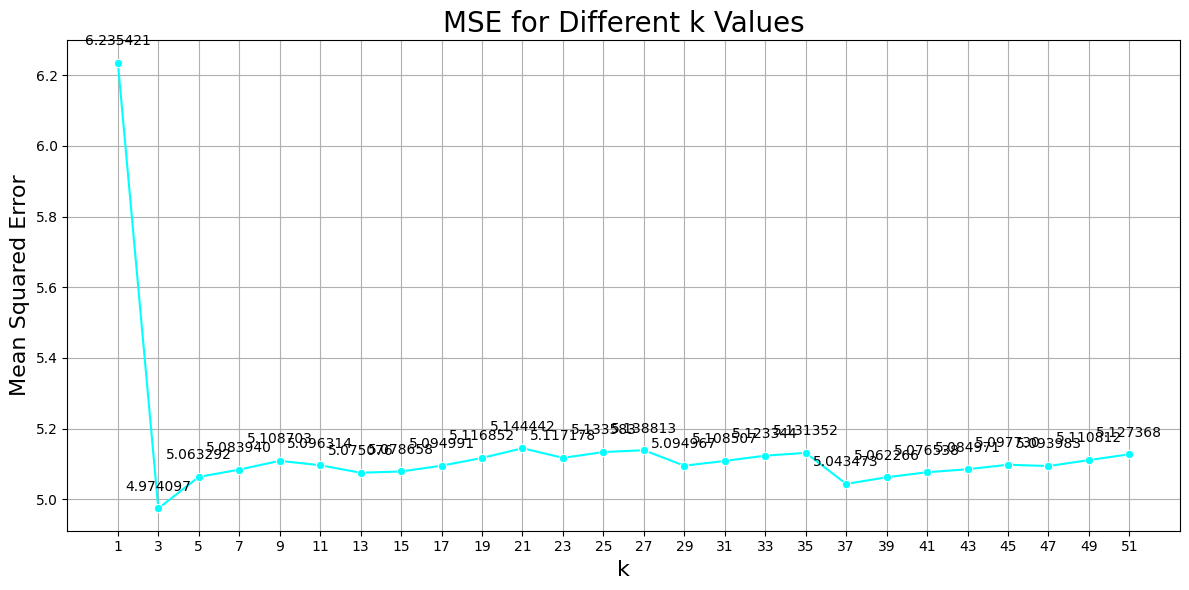

In [83]:
# plotting mse values for diff k 
plt.figure(figsize=(12, 6))
sns.lineplot(x='k', y='MSE', data=mse_df, color='cyan', marker='o')

for i in range(len(mse_df)):
    plt.text(
        mse_df['k'][i],
        mse_df['MSE'][i] + 0.05,
        f"{mse_df['MSE'][i]:2f}",
        ha ='center',
        fontsize=10
    )

plt.title("MSE for Different k Values", fontsize=20)
plt.xlabel("k", fontsize=16)
plt.ylabel("Mean Squared Error", fontsize=16)
plt.xticks(mse_df['k'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#removing the least significant features 
train_x_reduced = train_x.drop(train_x.columns[[1, 2, 9]], axis=1)
test_x_reduced= test_x.drop(test_x.columns[[1, 2, 9]], axis=1)

1 = 6.18
3 = 5.22
5 = 4.97
7 = 5.0
9 = 4.95
11 = 4.96
13 = 4.97
15 = 5.0
17 = 5.01
19 = 5.03
21 = 5.07
23 = 5.1
25 = 5.11
27 = 5.14
29 = 5.16
31 = 5.16
33 = 5.16
35 = 5.18
37 = 5.18
39 = 5.2
41 = 5.21
43 = 5.2
45 = 5.17
47 = 5.17
49 = 5.17
51 = 5.17


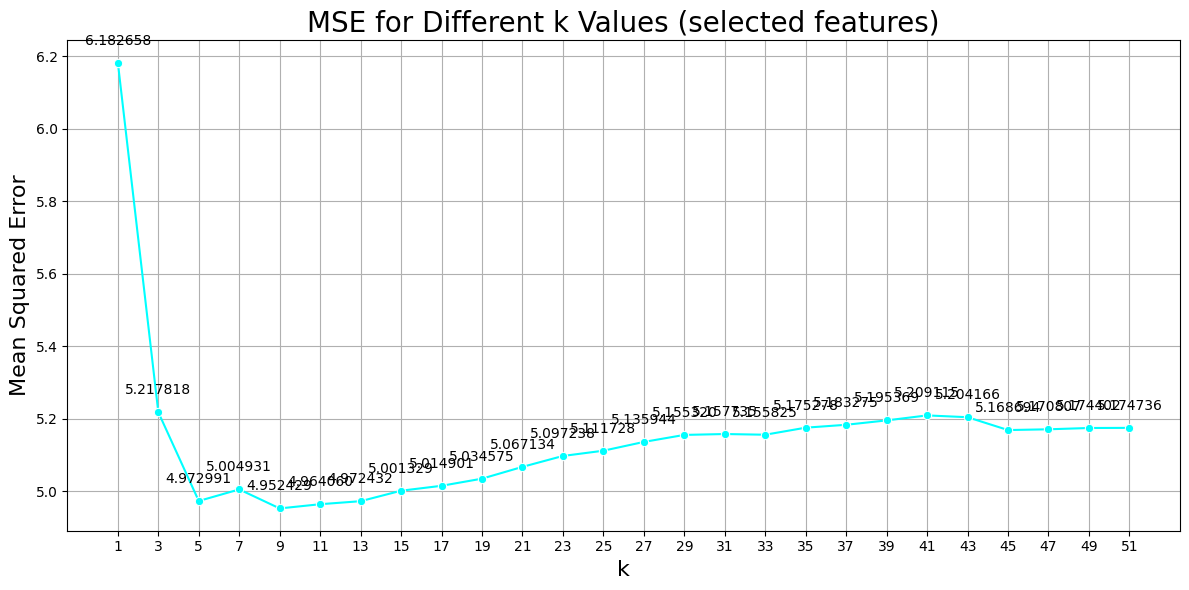

In [ ]:
#best fitting k after feature selection
k_values = list(range(1, 52, 2))
mse_values_reduced = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_x_reduced, train_y)
    predictions = knn_model.predict(test_x_reduced)
    mse = mean_squared_error(test_y, predictions)
    mse_values_reduced.append(mse)
    print(f"{k} = {round(mse, 2)}")

mse_df_reduced = pd.DataFrame({
    'k': k_values,
    'MSE': mse_values_reduced
})

#plots 

plt.figure(figsize=(12, 6))
sns.lineplot(x='k', y='MSE', data=mse_df_reduced, color='cyan', marker='o')

for i in range(len(mse_df_reduced)):
    plt.text(
        mse_df_reduced['k'][i],
        mse_df_reduced['MSE'][i] + 0.05,
        f"{mse_df_reduced['MSE'][i]:2f}",
        ha='center',
        fontsize=10
    )

plt.title("MSE for Different k Values (selected features)", fontsize=20)
plt.xlabel("k", fontsize=16)
plt.ylabel("Mean Squared Error", fontsize=16)
plt.xticks(mse_df_reduced['k'])
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final Evaluation (LOOCV at optimal k)  
Based on the previous results, \(k = 19\) was selected. Leave-One-Out Cross-Validation (LOOCV) was perfomed on the entire dataset using the optimal \(k\). In this exhaustive evaluation, each observation was held out in turn while the model was trained on the remaining data. The resulting LOOCV MSE and MAE provided our most precise estimates of the model’s true generalization error.  
  

In [87]:
#Loo- cross validation
fitted_values = []

for i in range(len(knn_df_scaled)):
    test_set = knn_df_scaled.iloc[[i]]
    train_set = knn_df_scaled.drop(index=i)

    train_x = train_set.drop(columns=['Global_Sales'])
    train_y = train_set['Global_Sales']
    test_x = test_set.drop(columns=['Global_Sales'])
    test_y = test_set['Global_Sales'].values[0]

    model = KNeighborsRegressor(n_neighbors=19)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)[0]

    fitted_values.append(pred)

fitted_values = np.array(fitted_values)
true_values = knn_df_scaled['Global_Sales'].values

knn_mse = round(mean_squared_error(true_values, fitted_values), 2)
knn_mae = round(mean_absolute_error(true_values, fitted_values), 2)

print("LOOCV MSE:", knn_mse)
print("LOOCV MAE:", knn_mae)


LOOCV MSE: 2.82
LOOCV MAE: 0.55


## Linear Regression

The following steps summarize the Linear Regression workflow implemented in this notebook:

#### Linear Regression Model Overview
1. **Data Preparation**  
2. **Train/Test Split**  
3. **Baseline OLS (all predictors)**  
4. **Correlation Analysis**  
5. **Reduced-Feature Regression**  
6. **Full-Feature Regression**  
7. **Diagnostic Plots**  
8. **3-Fold Cross-Validation**

#### Data Preparation  
  The cleaned dataset was copied and non-predictive columns (`Name`, `Unnamed: 0`) were removed. All categorical variables were factorized into numeric codes to enable regression modeling.


In [46]:
lr_df = df.drop(columns=['Name', 'Unnamed: 0'], errors='ignore').copy()
print(lr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      6825 non-null   category
 1   Genre         6825 non-null   category
 2   Publisher     6825 non-null   object  
 3   Global_Sales  6825 non-null   float64 
 4   Critic_Score  6825 non-null   float64 
 5   Critic_Count  6825 non-null   float64 
 6   User_Score    6825 non-null   float64 
 7   User_Count    6825 non-null   float64 
 8   Developer     6825 non-null   object  
 9   Rating        6825 non-null   category
 10  Game_Age      6825 non-null   float64 
 11  Game_Age_Int  6825 non-null   int64   
dtypes: category(3), float64(6), int64(1), object(2)
memory usage: 501.4+ KB
None


In [47]:
for col in lr_df.columns:
    if lr_df[col].dtype == 'object' or str(lr_df[col].dtype) == 'category':
        lr_df[col], _ = pd.factorize(lr_df[col])

lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6825 non-null   int64  
 1   Genre         6825 non-null   int64  
 2   Publisher     6825 non-null   int64  
 3   Global_Sales  6825 non-null   float64
 4   Critic_Score  6825 non-null   float64
 5   Critic_Count  6825 non-null   float64
 6   User_Score    6825 non-null   float64
 7   User_Count    6825 non-null   float64
 8   Developer     6825 non-null   int64  
 9   Rating        6825 non-null   int64  
 10  Game_Age      6825 non-null   float64
 11  Game_Age_Int  6825 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 640.0 KB


#### Train/Test Split 
   A 70/30 split of the data was generated using a fixed random seed, ensuring reproducible separation of training and test sets without information leakage.


In [48]:
train_size = int(0.7 * len(lr_df))
all_indices = np.arange(len(lr_df))
train_indices = np.random.choice(all_indices, size=train_size, replace=False)
test_indices = np.setdiff1d(all_indices, train_indices)

train_set = lr_df.iloc[train_indices].reset_index(drop=True)
test_set = lr_df.iloc[test_indices].reset_index(drop=True)


#### Baseline OLS (all predictors)  
   An ordinary least squares model was fit on all available predictors (with an included constant) against the test-set features. The resulting test-set MSE established a performance benchmark.


In [ ]:
#baselinemodel
X_test = test_set.drop(columns=['Global_Sales'])
y_test = test_set['Global_Sales']

X_test_const = sm.add_constant(X_test)

model1 = sm.OLS(y_test, X_test_const).fit()

predicted1 = model1.predict(X_test_const)

mse1 = np.mean((y_test - predicted1) ** 2)
print("MSE =", round(mse1, 2))


MSE = 2.6


#### Correlation Analysis  
   A full correlation heatmap was generated to assess pairwise relationships and detect potential multicollinearity among predictors.


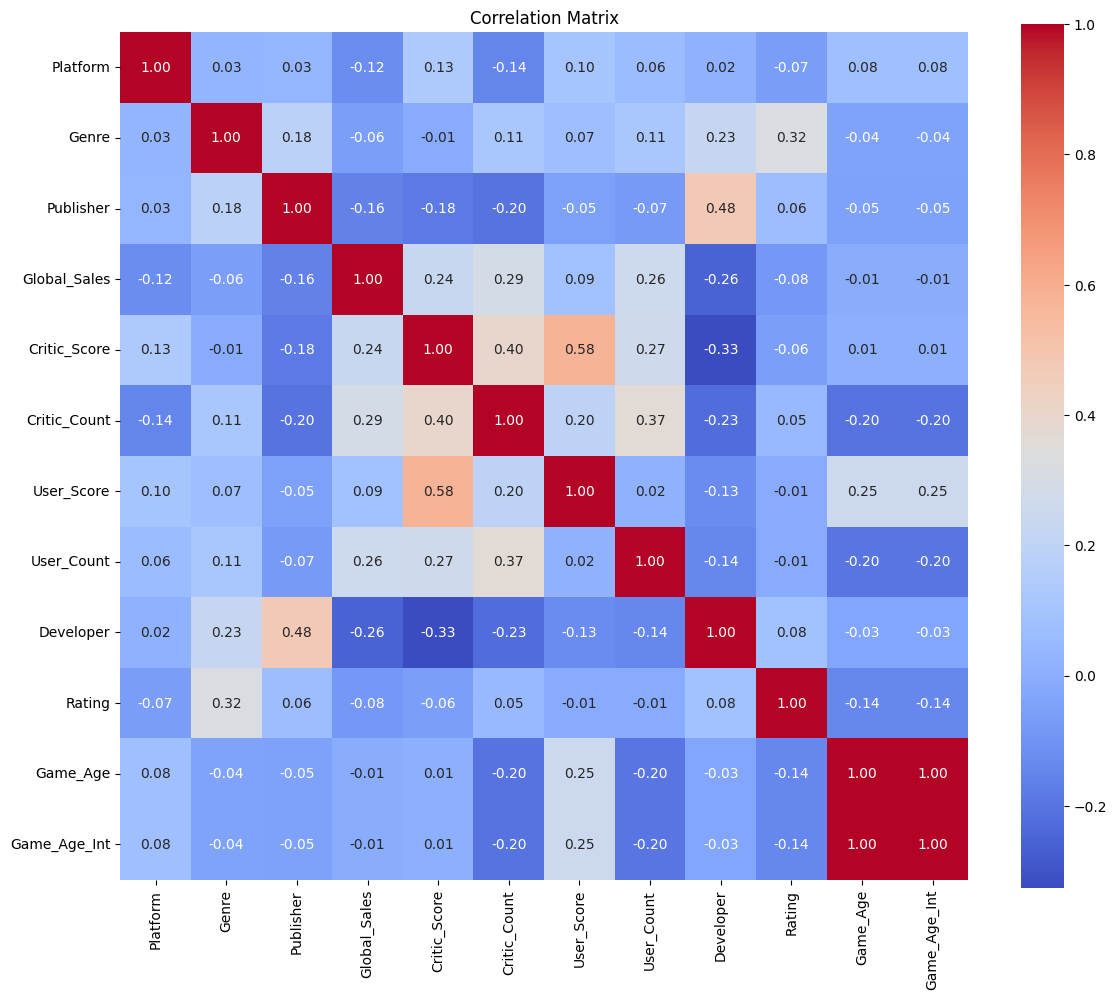

In [51]:
corr_matrix = lr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#### Reduced-Feature Regression
   A second OLS model was trained using only the three most significant predictors (`Critic_Score`, `Critic_Count`, `User_Count`). Its test-set MSE quantified the impact of feature reduction.

#### Diagnostic Plots
   Four diagnostic visuals (Residuals vs. Fitted, Normal Q–Q, Scale–Location, Residuals vs. Leverage) were generated for the reduced-feature model to verify linearity, homoscedasticity, error normality, and influence of outliers. Unlike R’s single `plot(lm)` call, these were manually assembled in Python since Statsmodels does not provide a combined diagnostics function.




                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 30 May 2025   Prob (F-statistic):          2.85e-131
Time:                        20:36:22   Log-Likelihood:                -9852.1
No. Observations:                4777   AIC:                         1.971e+04
Df Residuals:                    4773   BIC:                         1.974e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0069      0.145     -6.953   

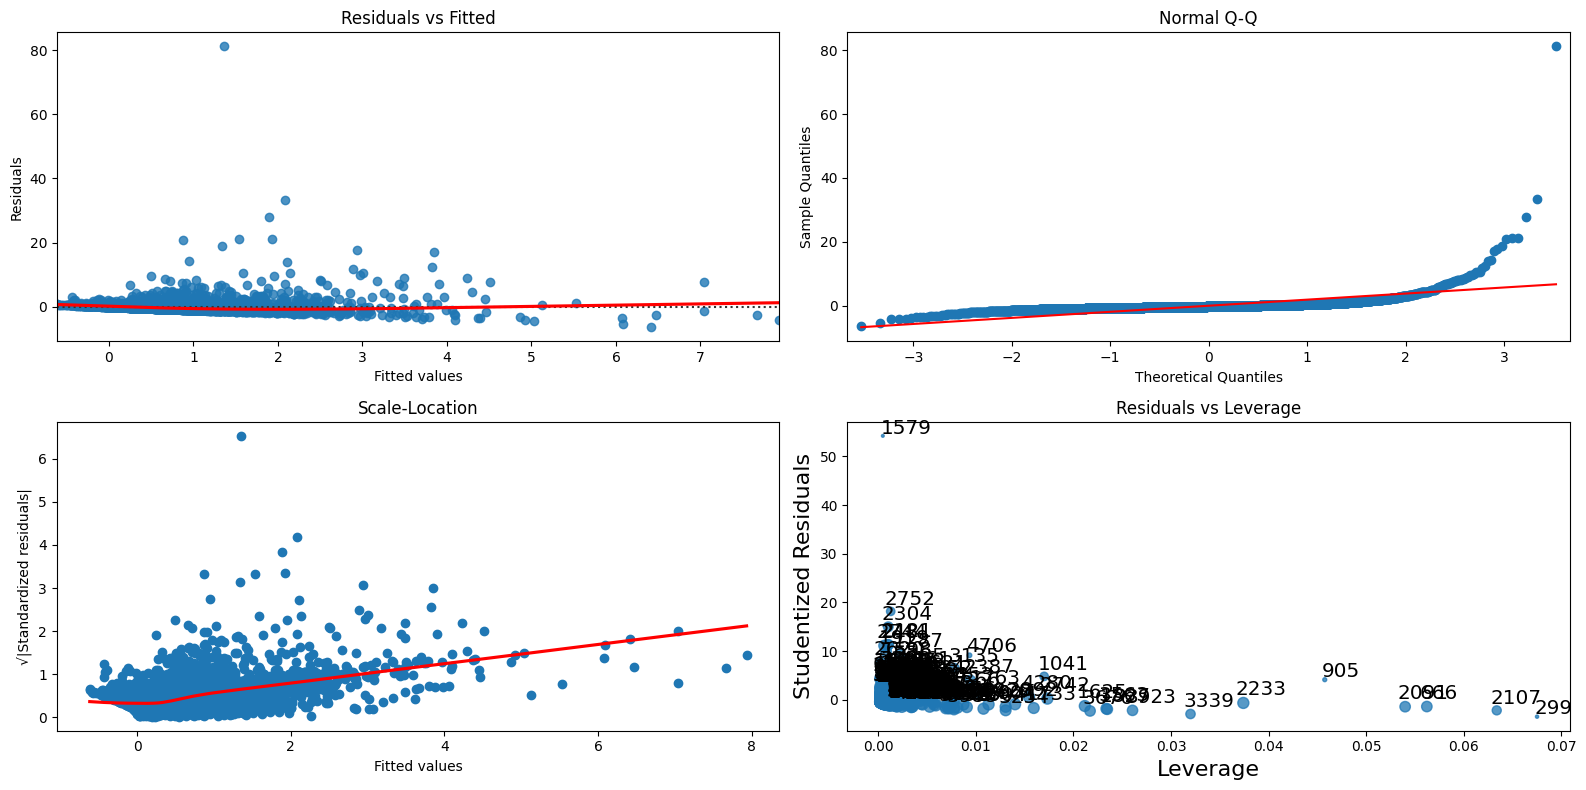

In [ ]:
X = train_set[['Critic_Score', 'Critic_Count', 'User_Count']]
y = train_set['Global_Sales']
X = sm.add_constant(X)
reg2 = sm.OLS(y, X).fit()
print(reg2.summary())

X_test = test_set[['Critic_Score', 'Critic_Count', 'User_Count']]
X_test = sm.add_constant(X_test)
y_test = test_set['Global_Sales']

predicted2 = reg2.predict(X_test)

mse = ((y_test - predicted2) ** 2).mean()
print("MSE =", round(mse, 2))

#diagnostic plots ( replicated to be same as the r function for this )
fig = plt.figure(figsize=(16, 8)) 

# 1
ax1 = fig.add_subplot(2, 2, 1)
fitted_vals = reg2.fittedvalues
residuals = reg2.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True, ax=ax1, line_kws={'color': 'red'})
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')

# 2
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Normal Q-Q')

# 3
ax3 = fig.add_subplot(2, 2, 3)
standardized_residuals = residuals / residuals.std()
ax3.scatter(fitted_vals, np.sqrt(np.abs(standardized_residuals)))
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(standardized_residuals)), lowess=True, ax=ax3, scatter=False, line_kws={'color': 'red'})
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('√|Standardized residuals|')

# 4
ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(reg2, ax=ax4, criterion="cooks", size=2)
ax4.set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

#### Full-Feature Regression
   Another OLS model incorporating all seven key features (`Critic_Score`, `Critic_Count`, `User_Count`, `Game_Age`, `Genre`, `Platform`, `Rating`) was fit on the training data and evaluated on the test set. The same diagnostic plots structure used above hhas been used here as well.


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     121.2
Date:                Fri, 30 May 2025   Prob (F-statistic):          1.89e-164
Time:                        20:36:57   Log-Likelihood:                -9764.7
No. Observations:                4777   AIC:                         1.955e+04
Df Residuals:                    4769   BIC:                         1.960e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6231      0.162     -3.858   

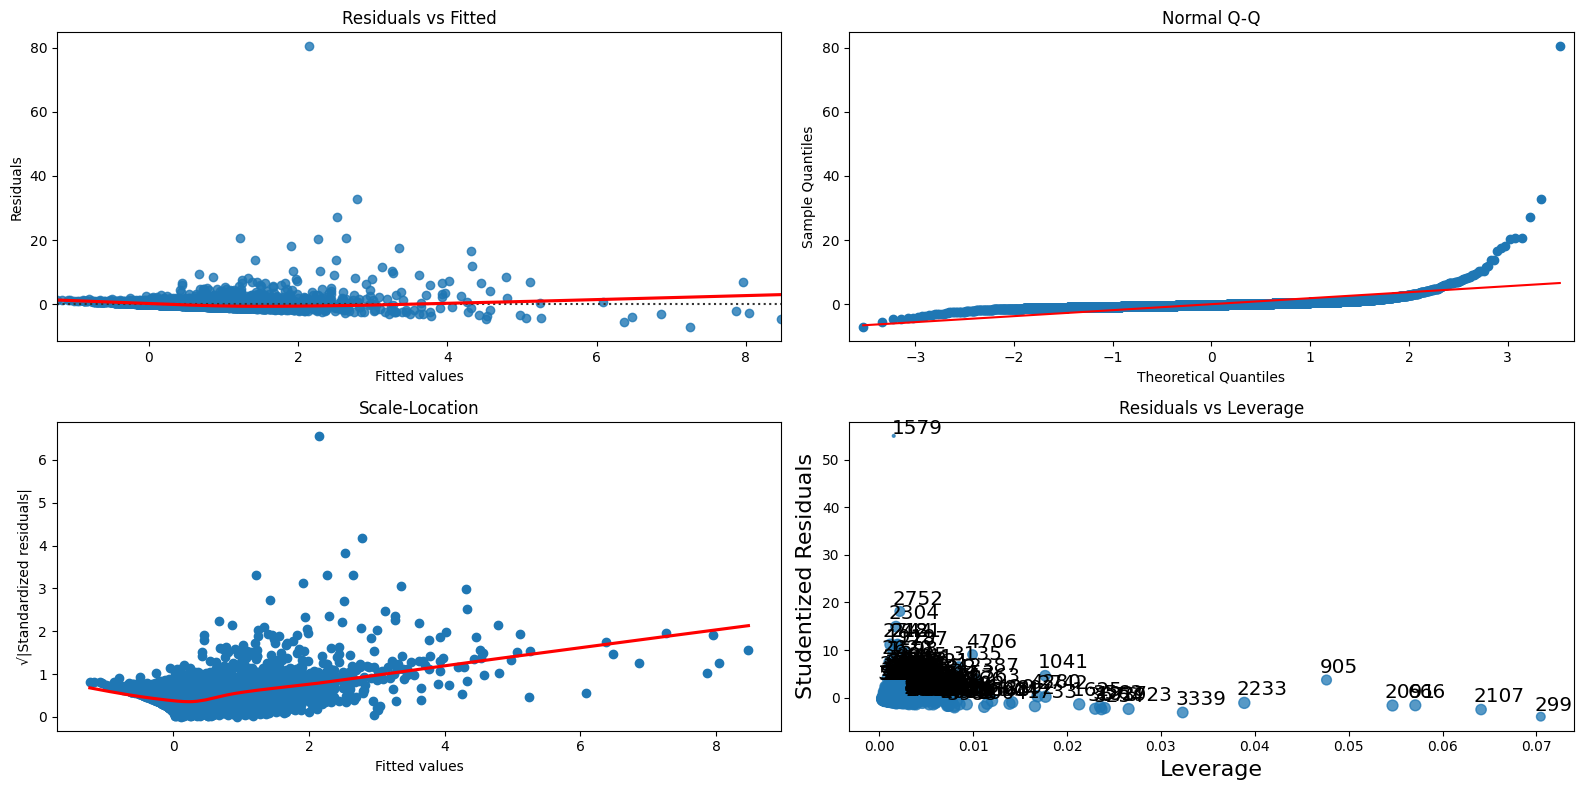

In [ ]:
X = train_set[['Critic_Score', 'Critic_Count', 'User_Count','Game_Age','Genre','Platform','Rating']]
y = train_set['Global_Sales']
X = sm.add_constant(X)
reg3 = sm.OLS(y, X).fit()
print(reg3.summary())

X_test = test_set[['Critic_Score', 'Critic_Count', 'User_Count','Game_Age','Genre','Platform','Rating']]
X_test = sm.add_constant(X_test)
y_test = test_set['Global_Sales']

predicted3 = reg3.predict(X_test)

mse3 = ((y_test - predicted3) ** 2).mean()
print("MSE =", round(mse3, 2))

#plots
fig = plt.figure(figsize=(16, 8))  

# 1
ax1 = fig.add_subplot(2, 2, 1)
fitted_vals3 = reg3.fittedvalues
residuals3 = reg3.resid
sns.residplot(x=fitted_vals3, y=residuals3, lowess=True, ax=ax1, line_kws={'color': 'red'})
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')

# 2
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(residuals3, line='s', ax=ax2)
ax2.set_title('Normal Q-Q')

# 3
ax3 = fig.add_subplot(2, 2, 3)
standardized_residuals3 = residuals3 / residuals3.std()
ax3.scatter(fitted_vals3, np.sqrt(np.abs(standardized_residuals3)))
sns.regplot(x=fitted_vals3, y=np.sqrt(np.abs(standardized_residuals3)), lowess=True, ax=ax3, scatter=False, line_kws={'color': 'red'})
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('√|Standardized residuals|')

# 4
ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(reg3, ax=ax4, criterion="cooks", size=2)
ax4.set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()



#### 3-Fold Cross-Validation 
   Features were standardized and a 3-fold cross-validation was conducted on the full dataset. Average MSE, RMSE, and MAE across folds provided insight into model stability under varied data splits.  

In [ ]:
# 3 fold cross validation
X = lr_df.drop(columns=["Global_Sales"])
y = lr_df["Global_Sales"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=5)
mse_scores, rmse_scores, mae_scores = [], [], []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)

average_mse, average_rmse, average_mae

(np.float64(3.1957171247644154),
 np.float64(1.7219699850503842),
 np.float64(0.7111005969094868))

## Decision Tree
The following steps summarize the Decision Tree workflow implemented in this notebook:

#### Decision Tree Model Overview
1. **Data Preparation**  
2. **Full Tree Fitting**  
3. **CV-Based Pruning Curve**  
4. **Pruned Tree Fitting**  
5. **Model Evaluation**  
6. **Actual vs. Predicted Scatterplot**

#### Data Preparation  
Three predictor variables (`Critic_Score`, `Critic_Count`, `User_Count`) were extracted from the cleaned dataset, and a 70/30 train/test split was created using the fixed random seed.


In [ ]:
X_train_tree = train_set[['Critic_Score', 'Critic_Count', 'User_Count']]
y_train_tree = train_set['Global_Sales']
X_test_tree  = test_set[['Critic_Score', 'Critic_Count', 'User_Count']]
y_test_tree  = test_set['Global_Sales']

#### Full Tree Fitting  
A `DecisionTreeRegressor` with no depth or leaf constraints was fit on the training split; its number of leaves and depth were printed and the full tree was visualized.


Full tree → leaves: 4569, depth: 29


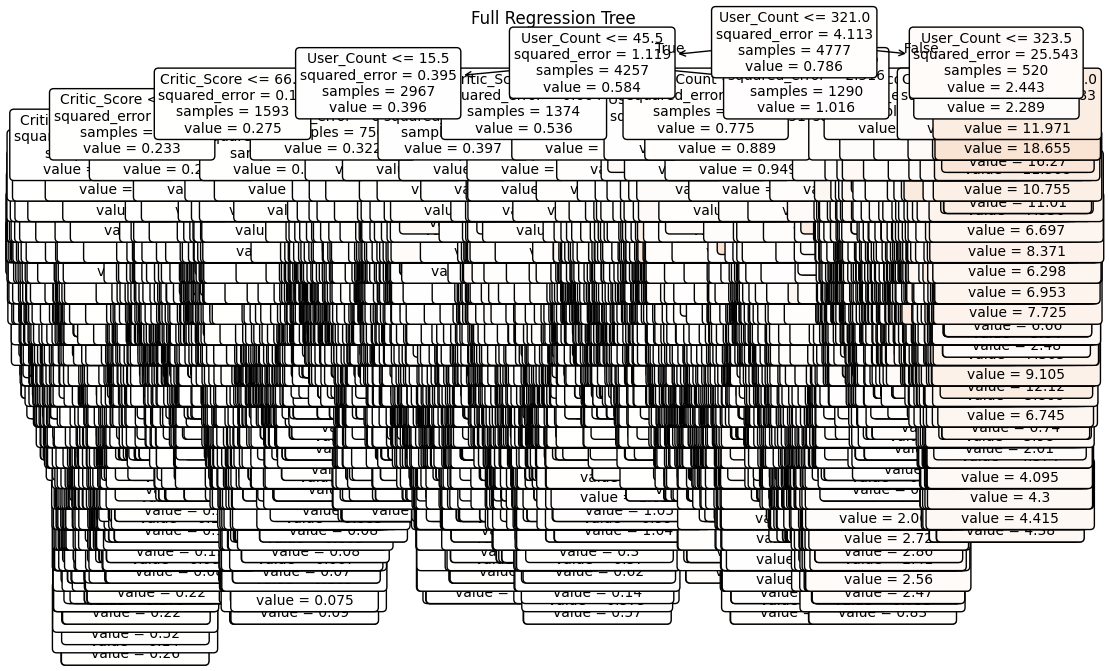

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree_full = DecisionTreeRegressor(random_state=SEED)
tree_full.fit(X_train_tree, y_train_tree)
print(f"Full tree → leaves: {tree_full.get_n_leaves()}, depth: {tree_full.get_depth()}")

plt.figure(figsize=(12, 8))
plot_tree(tree_full,
          feature_names=X_train_tree.columns,
          filled=True, rounded=True, fontsize=10)
plt.title("Full Regression Tree")
plt.show()

#### CV-Based Pruning Curve  
Trees with `max_leaf_nodes` from 2 to 9 were evaluated via 5-fold cross-validation on the training split. Total cross-validated RSS was plotted against leaf count to identify the optimal tree size.


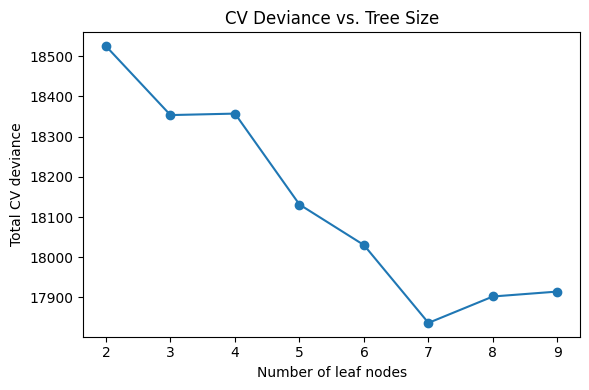

In [70]:
leaf_counts = list(range(2, 10))   
total_devs = []
for leaves in leaf_counts:
    m = DecisionTreeRegressor(max_leaf_nodes=leaves, random_state=SEED)
    neg_mse = cross_val_score(
        m,
        X_train_tree,
        y_train_tree,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    total_devs.append(-neg_mse.mean() * len(y_train_tree))

plt.figure(figsize=(6, 4))
plt.plot(leaf_counts, total_devs, marker='o')
plt.xlabel("Number of leaf nodes")
plt.ylabel("Total CV deviance")
plt.title("CV Deviance vs. Tree Size")
plt.tight_layout()
plt.show()

#### Pruned Tree Fitting  
A new `DecisionTreeRegressor` limited to the chosen 7 leaves(optimal number chosen based on previous evaluation) was fit on the full training split; its final leaf count and depth were confirmed and the pruned tree was plotted.


Pruned tree → leaves: 7, depth: 5


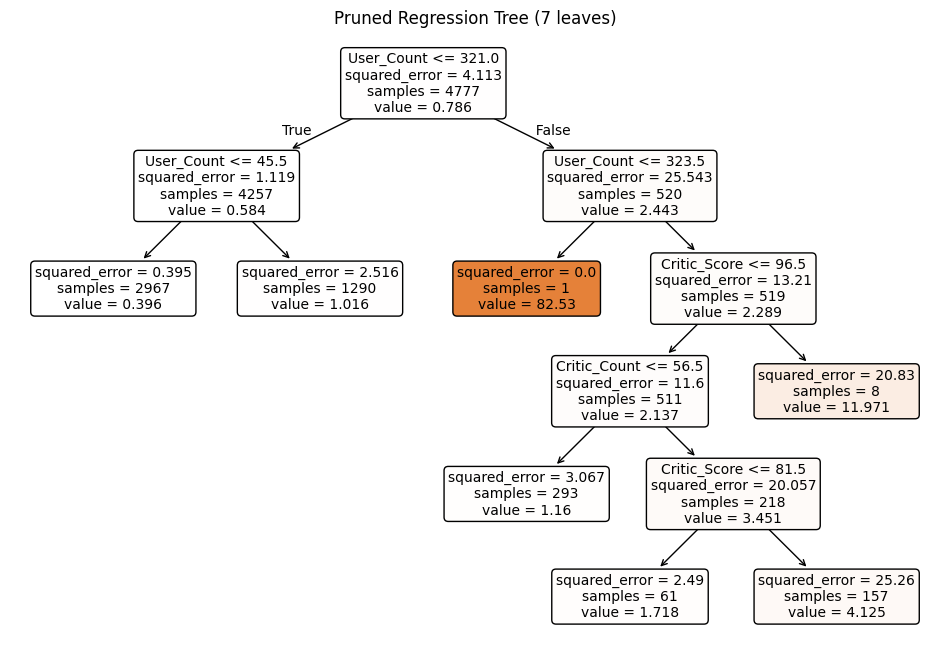

In [58]:
tree_pruned = DecisionTreeRegressor(max_leaf_nodes=7, random_state=SEED)
tree_pruned.fit(X_train_tree, y_train_tree)
print(f"Pruned tree → leaves: {tree_pruned.get_n_leaves()}, depth: {tree_pruned.get_depth()}")

plt.figure(figsize=(12, 8))
plot_tree(tree_pruned,
          feature_names=X_train_tree.columns,
          filled=True, rounded=True, fontsize=10)
plt.title("Pruned Regression Tree (7 leaves)")
plt.show()

#### Model Evaluation  
Predictions from both the unpruned and pruned trees were generated for the test set, and their MSE and MAE were computed for performance comparison.


In [71]:
yhat_full   = tree_full.predict(X_test_tree)
yhat_pruned = tree_pruned.predict(X_test_tree)

mse_full   = mean_squared_error(y_test_tree, yhat_full)
mse_pruned = mean_squared_error(y_test_tree, yhat_pruned)
mae_pruned = mean_absolute_error(y_test_tree, yhat_pruned)

print(f"\nfull tree mse =  {mse_full:.6f}")
print(f"7-leaf tree mse = {mse_pruned:.6f}")
print(f"7-leaf tree mae = {mae_pruned:.6f}")



full tree mse =  4.820848
7-leaf tree mse = 2.735002
7-leaf tree mae = 0.655925


#### Prediction vs. True Scatterplot  

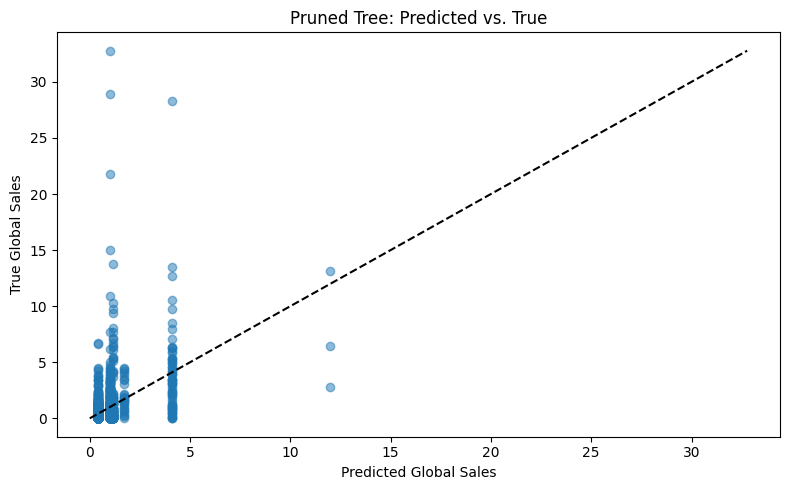

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(yhat_pruned, y_test_tree, alpha=0.5)
lims = [
    min(yhat_pruned.min(), y_test_tree.min()),
    max(yhat_pruned.max(), y_test_tree.max())
]
plt.plot(lims, lims, 'k--')
plt.xlabel("Predicted Global Sales")
plt.ylabel("True Global Sales")
plt.title("Pruned Tree: Predicted vs. True")
plt.tight_layout()
plt.show()

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 6. Metrics Evaluation   </center></p>

  A single Pandas DataFrame was assembled to compare test‐set MAE and MSE for all three models, specifically, KNN (k = 19 with LOOCV), Linear Regression (3-fold CV averages), and Decision Tree (7-leaf pruned model). followed by two bar charts (MAE and MSE) colored red, green, and blue for Decision Tree, KNN, and Linear Regression respectively. 
  
  This consolidated view makes it easy to see which model minimizes absolute error (MAE) versus squared error (MSE). 

Metrics Comparison Table
                Model  MAE  MSE
        Decision Tree 0.66 2.74
K - Nearest Neighbors 0.55 2.82
    Linear Regression 0.71 3.20


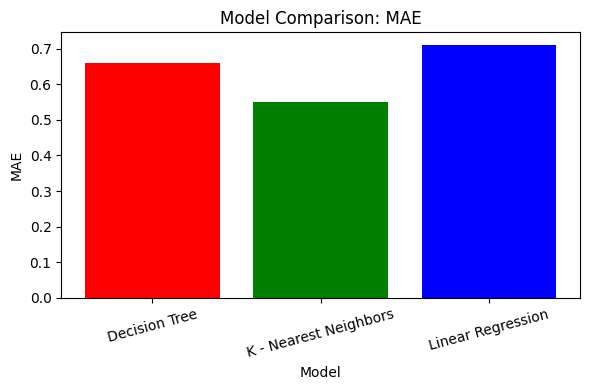

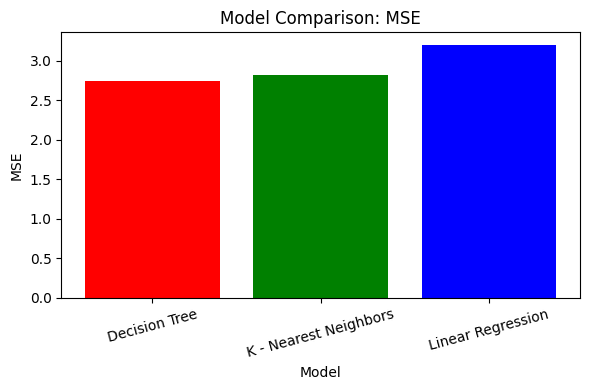

In [5]:
results = pd.DataFrame({
    "Model": [
        "Decision Tree",
        "K - Nearest Neighbors",
        "Linear Regression"
    ],
    "MAE": [0.66, 0.55, 0.71],
    "MSE": [2.74, 2.82, 3.20]
})
print("Metrics Comparison Table")
print(results.to_string(index=False))


#MAE comparison
plt.figure(figsize=(6, 4))
plt.bar(results['Model'], results['MAE'], color=['red', 'green', 'blue'])
plt.title('Model Comparison: MAE')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#MSE comparison
plt.figure(figsize=(6, 4))
plt.bar(results['Model'], results['MSE'], color=['red', 'green', 'blue'])
plt.title('Model Comparison: MSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 7. Conclusion  </center></p>

#### Reproducibility Assessment  
All key steps from the original Kaggle R notebook have been faithfully replicated in Python: data preprocessing, train/test splitting, baseline fitting, hyperparameter tuning, pruning via cross-validation, and final evaluation. The sequence and structure of analyses mirror the R workflow end to end, ensuring methodological consistency.

#### Performance Summary & Rankings  
**Model Performance Summary**  
- **KNN** achieved the lowest average absolute error (MAE), demonstrating robust median performance.  
- **Decision Tree** yielded the lowest squared error (MSE), indicating strong handling of outliers after pruning.  
- **Linear Regression** provided a stable baseline but lagged behind on both metrics.

**Final Model Rankings**  
- **By MAE (lowest is best):**  
  1. K – Nearest Neighbors  
  2. Decision Tree  
  3. Linear Regression  

- **By MSE (lowest is best):**  
  1. Decision Tree  
  2. K – Nearest Neighbors  
  3. Linear Regression 

#### Implementation Differences and Ranking Variations  
Although the Python workflow mirrors every analytical step of the Kaggle R notebook, small discrepancies in MAE/MSE values and the resulting model rankings arise from practical implementation differences.

- **Data Partitioning and CV Schemes**  
  - R’s `sample()` + 10-fold `cv.tree()` (and 10-fold CV for KNN) partitions differ from Python’s `train_test_split`/`np.random.choice` + 5-fold CV (and LOOCV for KNN). Even with the same seed, fold assignments and hold-out splits do not align exactly, shifting each model’s error estimates.  

- **Algorithm Default Settings and Hyperparameters**   
  Each model ended up with different “best” settings under its respective CV scheme, shifting relative performance:

  | Model            | R’s Setting & Error Ranking             | Python’s Setting & Ranking      |
  |------------------|-----------------------------------------|---------------------------------|
  | KNN              | \(k=6\), best MSE → 1st by MSE          | \(k=19\), 2nd by MSE, 1st by MAE |
  | Decision Tree    | 6 leaves, 3rd by MAE & MSE              | 7 leaves, 1st by MSE, 2nd by MAE|
  | Linear Regression| 3-fold test split, 2nd by MSE & MAE     | 3-fold CV averages, 3rd overall |

  - **Decision Tree**: R’s `tree()` pre-prunes (mincut=5, mindev=0.01) and uses 10-fold CV to pick 6 leaves. Python’s `DecisionTreeRegressor` grows until pure by default and used a 5-fold CV curve to select 7 leaves.  
  - **KNN**: R selected \(k=6\) under 10-fold CV; Python chose \(k=19\) via LOOCV.  
  - **Linear Regression**: R reported test-split errors from a single fit, whereas Python added separate 3-fold CV averages.

- **Numerical Solver and Floating-Point Variations**  
  - R’s `lm()` (QR decomposition) vs. Statsmodels’ `OLS` (LAPACK) yield slightly different coefficients. KNN distance calculations and tree-split optimizations also vary in floating-point rounding.  

These factors jointly explain both the minor numeric shifts in MAE/MSE and the reordering of “best” models (e.g. KNN outranking Decision Tree by MAE in Python, versus the reverse in R). Aligning every detail—same splits, CV folds, encoding, pruning rules, and hyperparameter settings—would reproduce the original R rankings exactly.  


# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 8. References  </center></p>
